In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal


In [227]:
folder = '230721 statphys poster/TLO/'
df_TLO = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])
name = 'normal'

In [228]:
df_f_cluster = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 {name} cluster TLO.xlsm',index_col=[0,1])


In [229]:
cluster_size = ['c0', 'c1', 'c2', 'c3', 'c4','c5', 'c6', 'c7', 'c8', 'c9']
cluster_pvel = ['c0 phase vel', 'c1 phase vel','c2 phase vel', 'c3 phase vel', 'c4 phase vel', 'c5 phase vel','c6 phase vel', 'c7 phase vel', 'c8 phase vel', 'c9 phase vel']

In [230]:
seed = 10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) - np.mean(omega)

In [231]:
def to_mdf(df,m):
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == m]
    Ks = df_m.K.to_numpy()
    df_m = df_m.set_index('K')
    return df_m,Ks
def to_maxomega(x):
    if type(x)!= float:
        cluster = omega[np.array(list(map(int,x.split(' '))))] 
        cluster -= np.mean(cluster)
        return np.max(abs(cluster))
    else: return np.nan

def KR_underK(set,K):
    Ks,Rs = set
    K_ = Ks[Ks<K] 
    R_ = Rs[Ks<K] 
    return (K_,R_)

In [232]:
# K_backs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
K_backs = [3,4,5,6,10,15]
# K_backs = [3,4,6,10,15]

df_b_dick = {}
for K_back in  K_backs:
    df_b_dick[K_back] = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 normal {K_back}-0 TLO.xlsm',index_col=[0,1])
    
tab_color_list = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']
df = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])


In [233]:
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)
def get_nearest_KR(R,F_new):
    F_K,F_R = F_new
    r_idx = np.searchsorted(F_R,R)
    return F_K[r_idx],F_R[r_idx]
def get_near_o(R,F_new,m):
    F_K,F_R = F_new
    r_idx = np.searchsorted(F_R,R)
    K_new,r_new = F_K[r_idx],F_R[r_idx]
    O = O_p(K_new*r_new,m)
    return O

In [234]:
m_to_draw = 6

KF,RF,KB,RB= KR(m_to_draw)
F = KF,RF
B = KB,RB
F_new = dK_graph(F,0.05)
BU,BO = split_uo(*B)

In [235]:
df_6,Ks = to_mdf(df,m_to_draw)
K_rs = df_6.r
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)
O_ps = (K_rs*Ks).apply(O_p,m=m_to_draw)
O_ps_n = K_rs.apply(get_near_o,F_new=F_new,m=m_to_draw)

df_m_cluster,Ks = to_mdf(df_f_cluster,m_to_draw)
df_m_r,Ks = to_mdf(df,m_to_draw)
max_o = df_m_cluster['c0 list'].apply(to_maxomega)

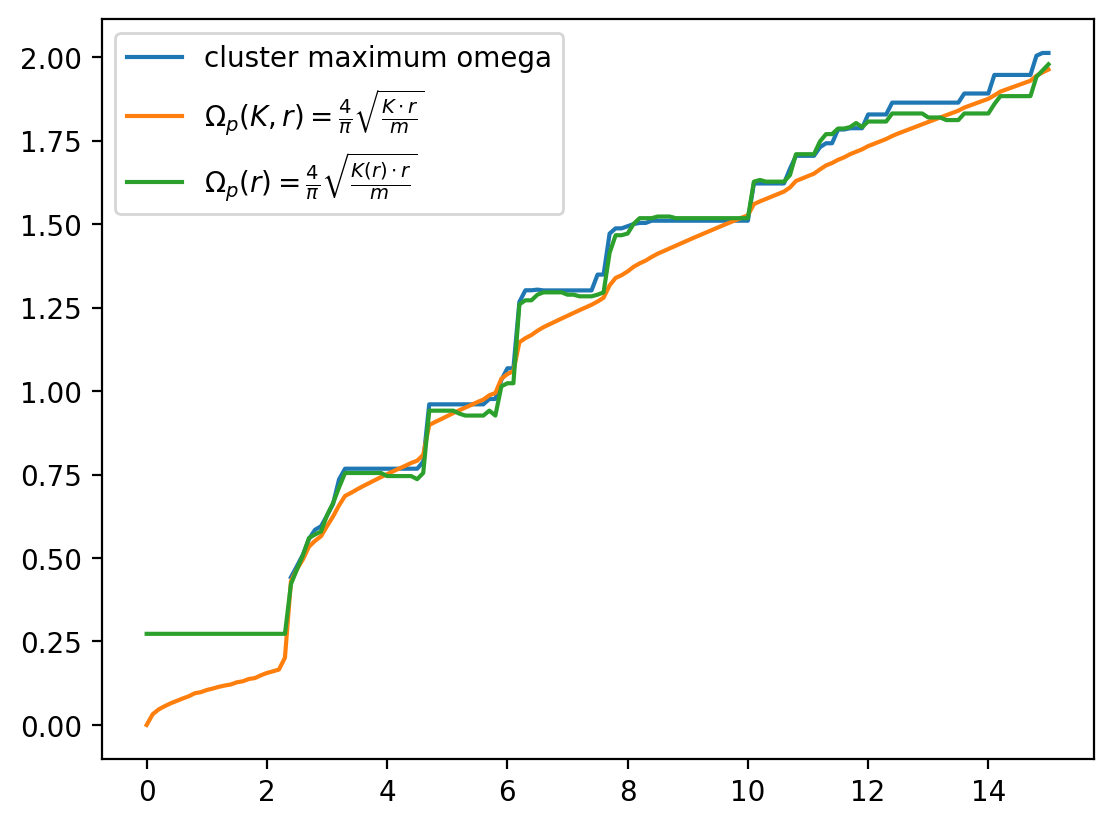

In [236]:
plt.plot(Ks,max_o,label = r'cluster maximum omega')
plt.plot(Ks,O_ps,label = r'$\Omega_p(K,r) = \frac{4}{\pi}\sqrt{\frac{K\cdot r}{m}}$')
plt.plot(Ks,O_ps_n,label=r'$\Omega_p(r) = \frac{4}{\pi}\sqrt{\frac{K(r)\cdot r}{m}}$')
plt.legend()

In [237]:
D_sets_op_n = {}
U_sets_op_n = {}
for K in K_backs:
    O = O_ps_n.iloc[int(K*10)]
    O_ = max_o.loc[K]
    if ~np.isnan(O_):
        D,U = KR0(m_to_draw,O)
        D_sets_op_n[K] = D
        U_sets_op_n[K] = U

In [238]:
backs_r = []
backs_K = []
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()
    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])

In [239]:
D_sets_op_B = {}
U_sets_op_B = {}
for K,r in zip(backs_K,backs_r):
    O = get_near_o(r,F_new,m_to_draw)
    D,U = KR0(m_to_draw,O)
    D_sets_op_B[K] = D
    U_sets_op_B[K] = U


In [240]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

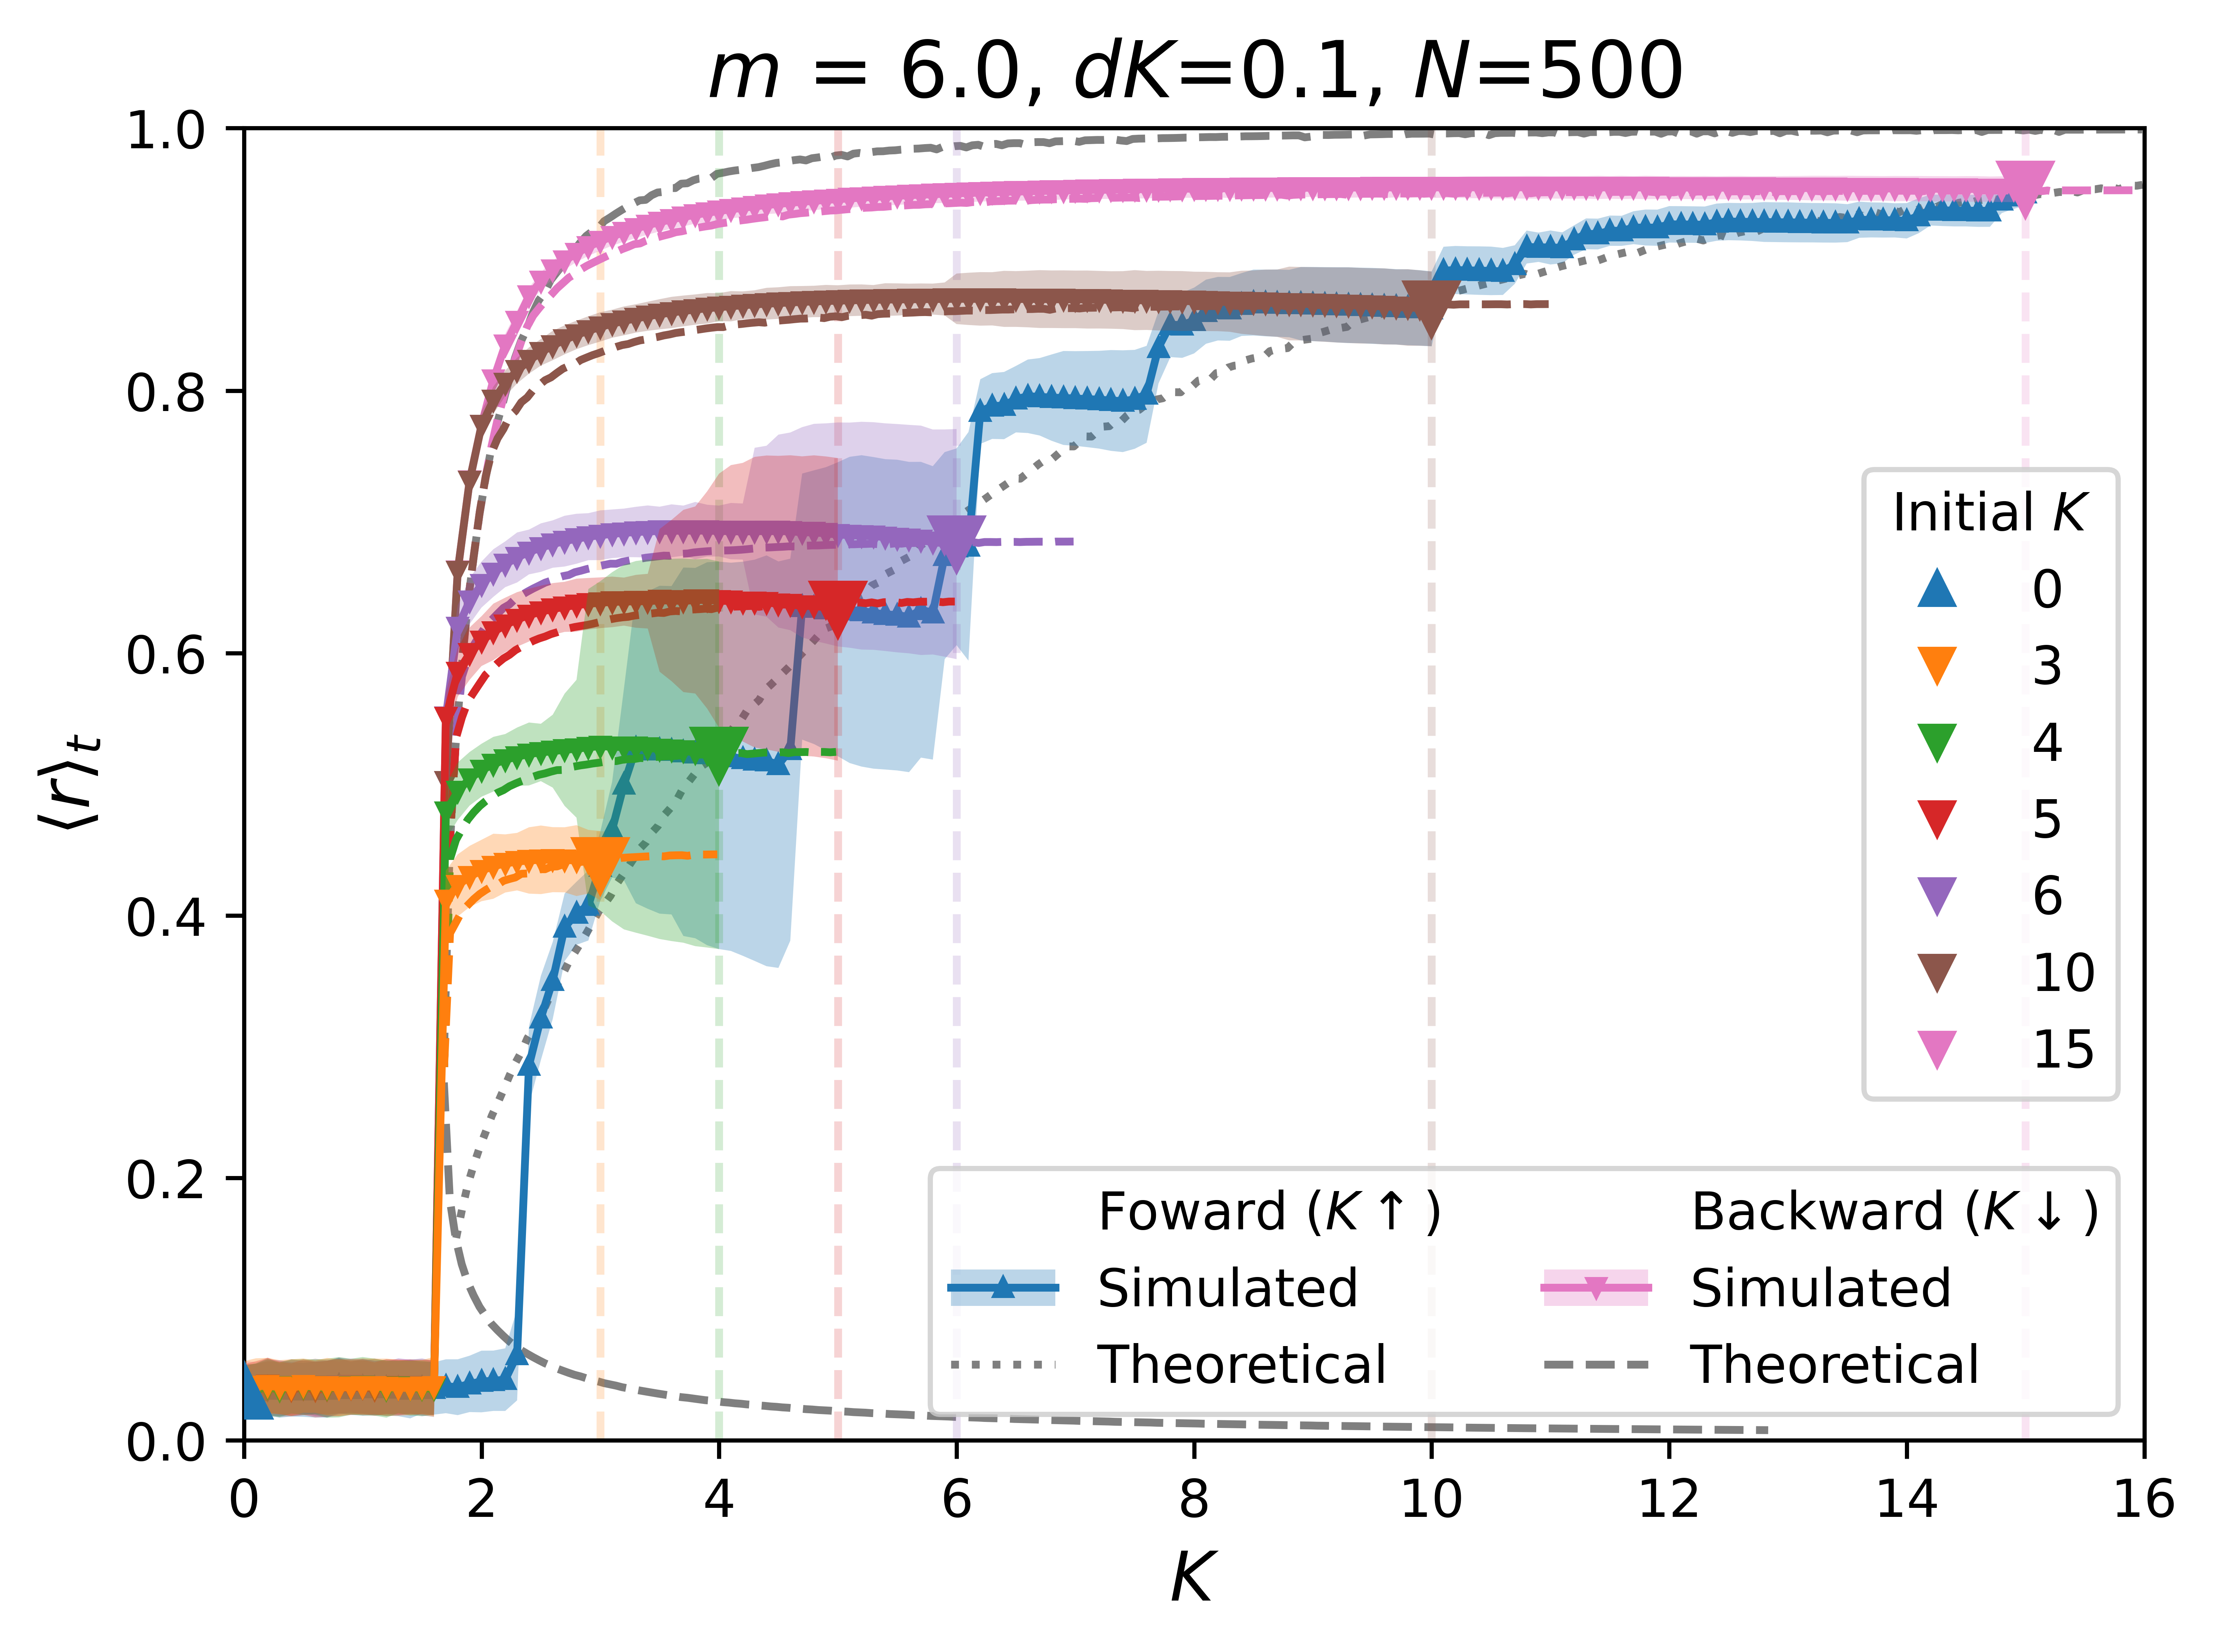

In [258]:
plt.figure(figsize=(6,4.5),dpi=500)
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()

lf,= plt.plot(Ks,rs,'-',label=r'$K_{forward}$',color = 'tab:blue')
_,= plt.plot(Ks[0],rs[0],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=10,zorder=10)
mf,= plt.plot(Ks[:],rs[:],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=3)
ff = plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
plt.legend([(lf,ff)],K_backs,title=f'Backward')

backs_r = []
backs_K = []
num = len(df_b_dick)+1
num_c = 1
B_legends = []
B_legends2 = ()
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    m,=plt.plot(Ks[:],rs[:],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
    _,=plt.plot(Ks[-1],rs[-1],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=10)
    Ku,Ru = U_sets_op_B[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+1] 
        Ru_ = Ru[Ku<K_back+1] 
        plt.plot(Ku_,Ru_,linestyle='--',color = tab_color_list[num_c],zorder= num)
    f=plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
    num -=1
    num_c +=1
    B_element = (l,m,f)
    B_label = K_back
    B_legends.append(B_element)
ax = plt.gca()
plt.legend(B_legends,K_backs,title=f'Backward')#,handler_map={tuple: HandlerTuple(ndivide=None)})



p0, = plt.plot(np.nan,np.nan,'^',color=tab_color_list[0])
p1, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[1])
p2, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[2])
p3, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[3])
p4, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[4])
p5, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[5])
p6, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[6])

string = ', '.join(map(str,K_backs))
ax =plt.gca()

plt.xlim(0,16)
plt.ylim(0,1)
p_F, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
p_B, = plt.plot([0],  marker='None',
        linestyle='None', label='dummy-empty')
categories = ['Simulated','Theoretical']

F_, = plt.plot(*KR_underK(F_new,16),':',color ='tab:gray',zorder=0)
B_, = plt.plot(*KR_underK(BU,16),linestyle='--',color = 'tab:gray',zorder=0)
plt.plot(*KR_underK(BO,16),linestyle='--',color = 'tab:gray',zorder=0)
leg3 = plt.legend([p_F,(lf,mf,ff),F_, p_B, (l,m,f), B_],
                    [r'Foward ($K\uparrow$)'] + categories + [r'Backward ($K\downarrow$)'] + categories,
                    loc = 4,ncol=2)
leg_c = plt.legend([p0,p1,p2,p3,p4,p5,p6],[0]+K_backs,loc=5,title=r'Initial $K$')


ax.add_artist(leg3)
plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
plt.ylabel(r'$\langle$$r$$\rangle$$_t$',fontsize=13)
plt.xlabel(r'$K$',fontsize=13)
plt.tight_layout()


<Axes: >

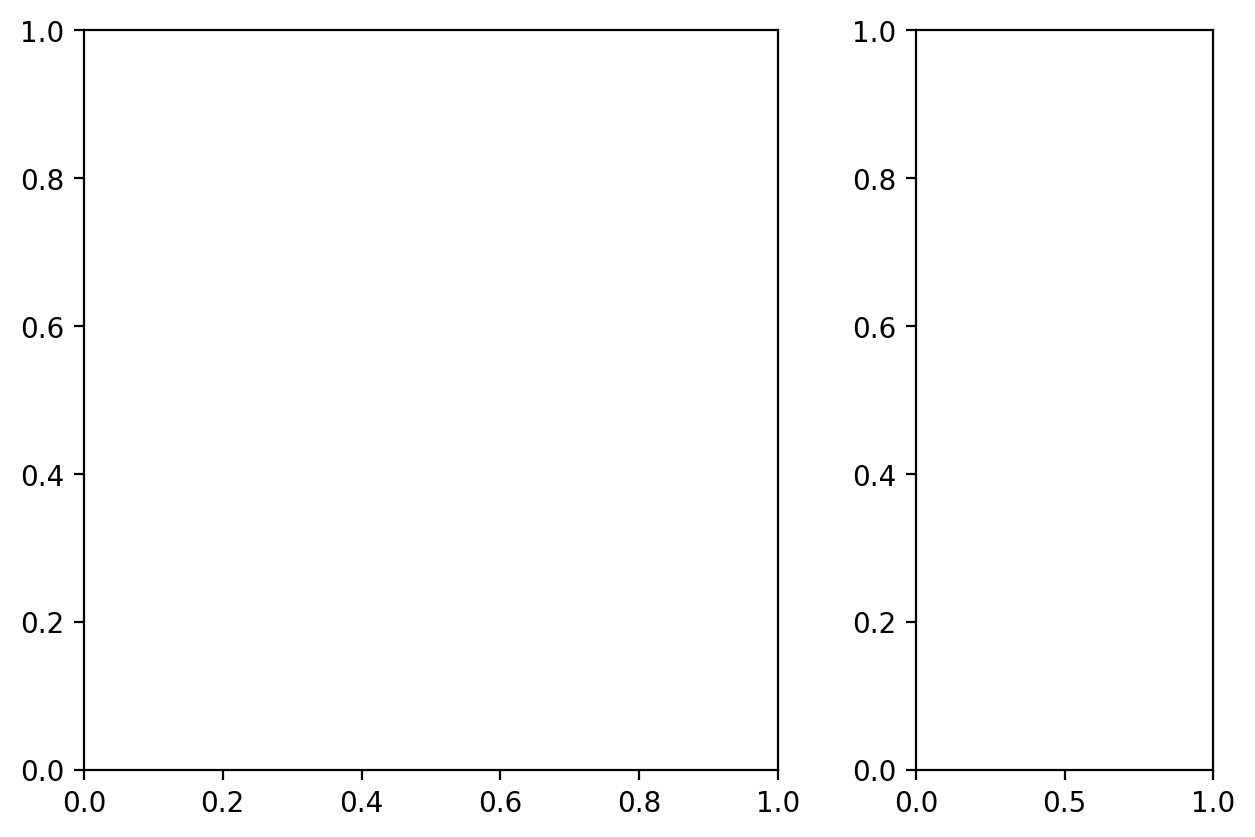

In [246]:
fig = plt.figure()
fig_r,fig_s = fig.subfigures(1,2,wspace=0.5,width_ratios=[7,3])
fig_r.subplots(1)
fig_s.subplots(1)

In [247]:
def re_cluster(df,direction,K_start):
    S = df['c0'].unstack().to_numpy()
    c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
    c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']
    df_new = df.copy()
    re_df = df.reset_index()
    Ks = re_df.K.unique()
    ms = re_df.m.unique()
    datas = []
    for m in ms:
        for K in Ks:
            temp_o = df.loc[(K,m)][c_o].dropna().to_numpy()
            temp_s = df.loc[(K,m)][c_s].dropna().to_numpy()
            rstd = df.loc[(K,m)]['rstd']
            o10 = temp_o[temp_s>10]
            s10 = temp_s[temp_s>10]
            num_p = 0
            num_m = 0
            if len(o10) != 0:
                if abs(o10[0])<0.5:
                    data = [K,m,o10[0],s10[0],'main',rstd,direction,K_start]
                    datas.append(data)
                    df_new.loc[(K,m),'main_s'] = s10[0]
                    df_new.loc[(K,m),'main_o'] = o10[0]
                    o_c10 = o10[1:]
                    s_c10 = s10[1:]
                else:
                    o_c10 = o10[:]
                    s_c10 = s10[:]
                if len(o_c10) != 0:            
                    argsort = np.argsort(s_c10)[::-1]
                    num_c_p = 0
                    num_c_m = 0
                    for i,tempo in enumerate(o_c10[argsort]):
                        if abs(tempo)<2.5:
                            if tempo > 0:
                                if num_c_p == 0:
                                    data = [K,m,o_c10[argsort[i]],s_c10[argsort[i]],'2nd cluster(+)',rstd,direction,K_start]
                                    num_c_p+=1
                                    datas.append(data)
                                df_new.loc[(K,m),f'p_s_{num_p}'] = s_c10[argsort[i]]
                                df_new.loc[(K,m),f'p_o_{num_p}'] = o_c10[argsort[i]]
                                num_p +=1
                            elif tempo < 0:
                                if num_c_m == 0:
                                    data = [K,m,o_c10[argsort[i]],s_c10[argsort[i]],'2nd cluster(-)',rstd,direction,K_start]
                                    num_c_m+=1
                                    datas.append(data)


                                df_new.loc[(K,m),f'm_s_{num_m}'] = s_c10[argsort[i]]
                                df_new.loc[(K,m),f'm_o_{num_m}'] = o_c10[argsort[i]]
                                num_m +=1
    return df_new,datas

In [248]:
temp = {}
df_new_dict = {}
df_new_dict[0],temp[0] = re_cluster(df_TLO,'Foward',0)
for K_back,df_b in df_b_dick.items():
    df_new_dict[K_back],temp[K_back] = re_cluster(df_b,'Backward',K_back)

In [249]:
temps = []
for K_back,df_b in temp.items():
    temps+=df_b

In [250]:
df_data = pd.DataFrame(temps,columns=['K','m','cluster mean phase velocity','cluster size','type',r'$r$\'s temporal std','direction','K_start'])

In [256]:
axs = fig_s.subplots(3,1,height_ratios=[4,1,1],sharex=True)

markers = ['^']+['v']*len(K_backs)
# markers = ['.']+[',']*len(K_backs)
TO_DRAW = ['main_s','p_s_0','m_s_0']
TEXT = ['main cluster',r'secondary cluster $(+)$',r'secondary cluster $(-)$']
for to_d, ax,text in zip(TO_DRAW,axs,TEXT):
    num = 0
    num_c = 0
    plt.sca(ax)
    for i,(K_back,df_b) in enumerate(list(df_new_dict.items())):

        ms = df_b.reset_index().m.unique()
        re_df = df_b.reset_index()

        df_m = re_df[re_df.m == m_to_draw]
        Ks = df_m.K.to_numpy()
        rs = df_m[to_d].to_numpy()/N
        rstd = df_m.rstd.to_numpy()
        rMM= df_m.rMM.to_numpy()
        plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
        l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
        m,=plt.plot(Ks[::1],rs[::1],markers[i],color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
        _,=plt.plot(Ks[-1],rs[-1],markers[i],color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=6)
        num +=1
        num_c +=1
        B_element = (l,m,f)
        B_label = K_back
        B_legends.append(B_element)
        min_,_ = plt.gca().get_ylim()
    print(min_)
    plt.text(16-0.1,min_,text,horizontalalignment='right',verticalalignment='bottom')
# ax = plt.gca()

axs[0].set_ylim(0.3382,1)
ax =plt.gca()
# plt.ylim(0,1)
plt.xlim(0,16)

0.3382
0.0317
0.0157


(0.0, 16.0)

0.3382
0.0317
0.0157


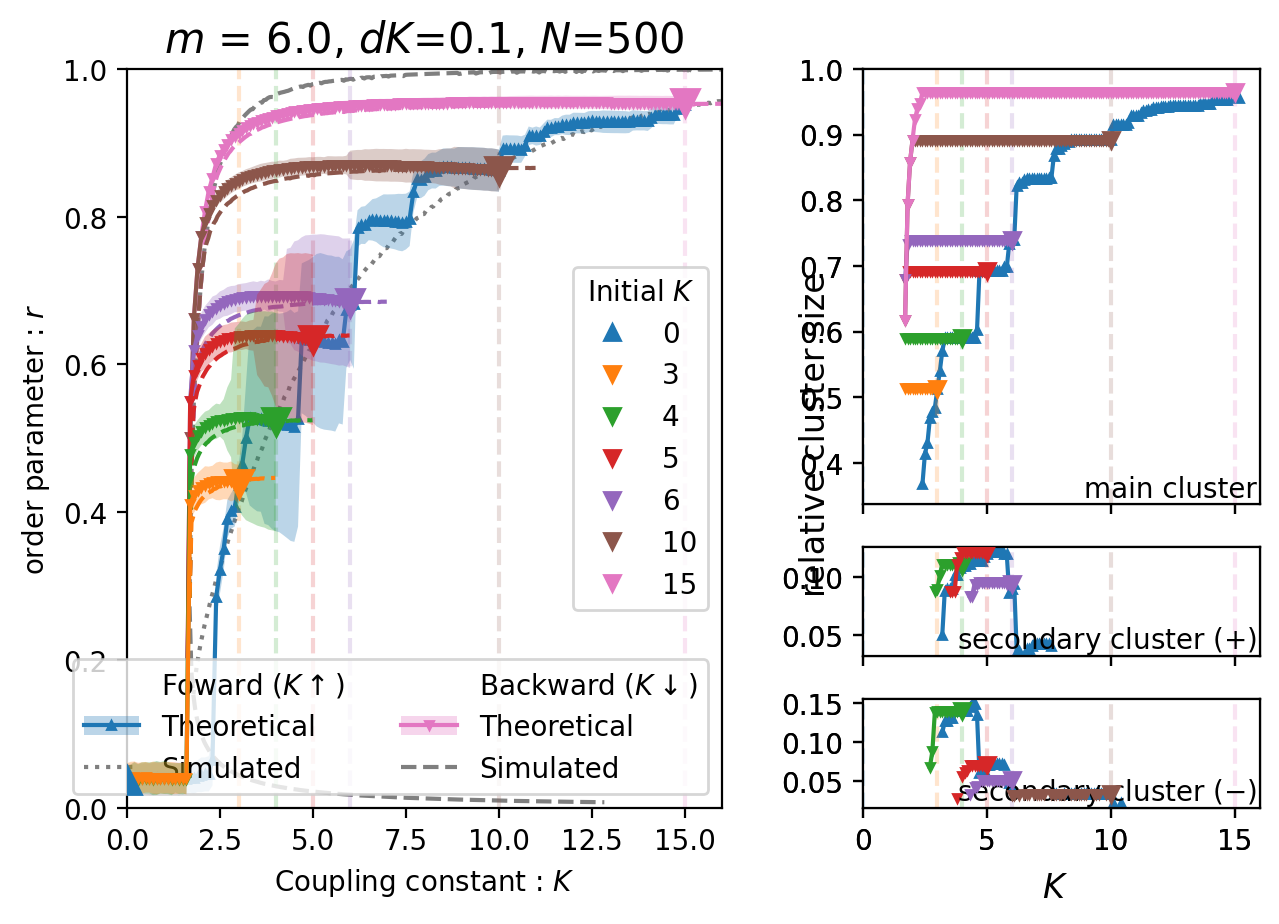

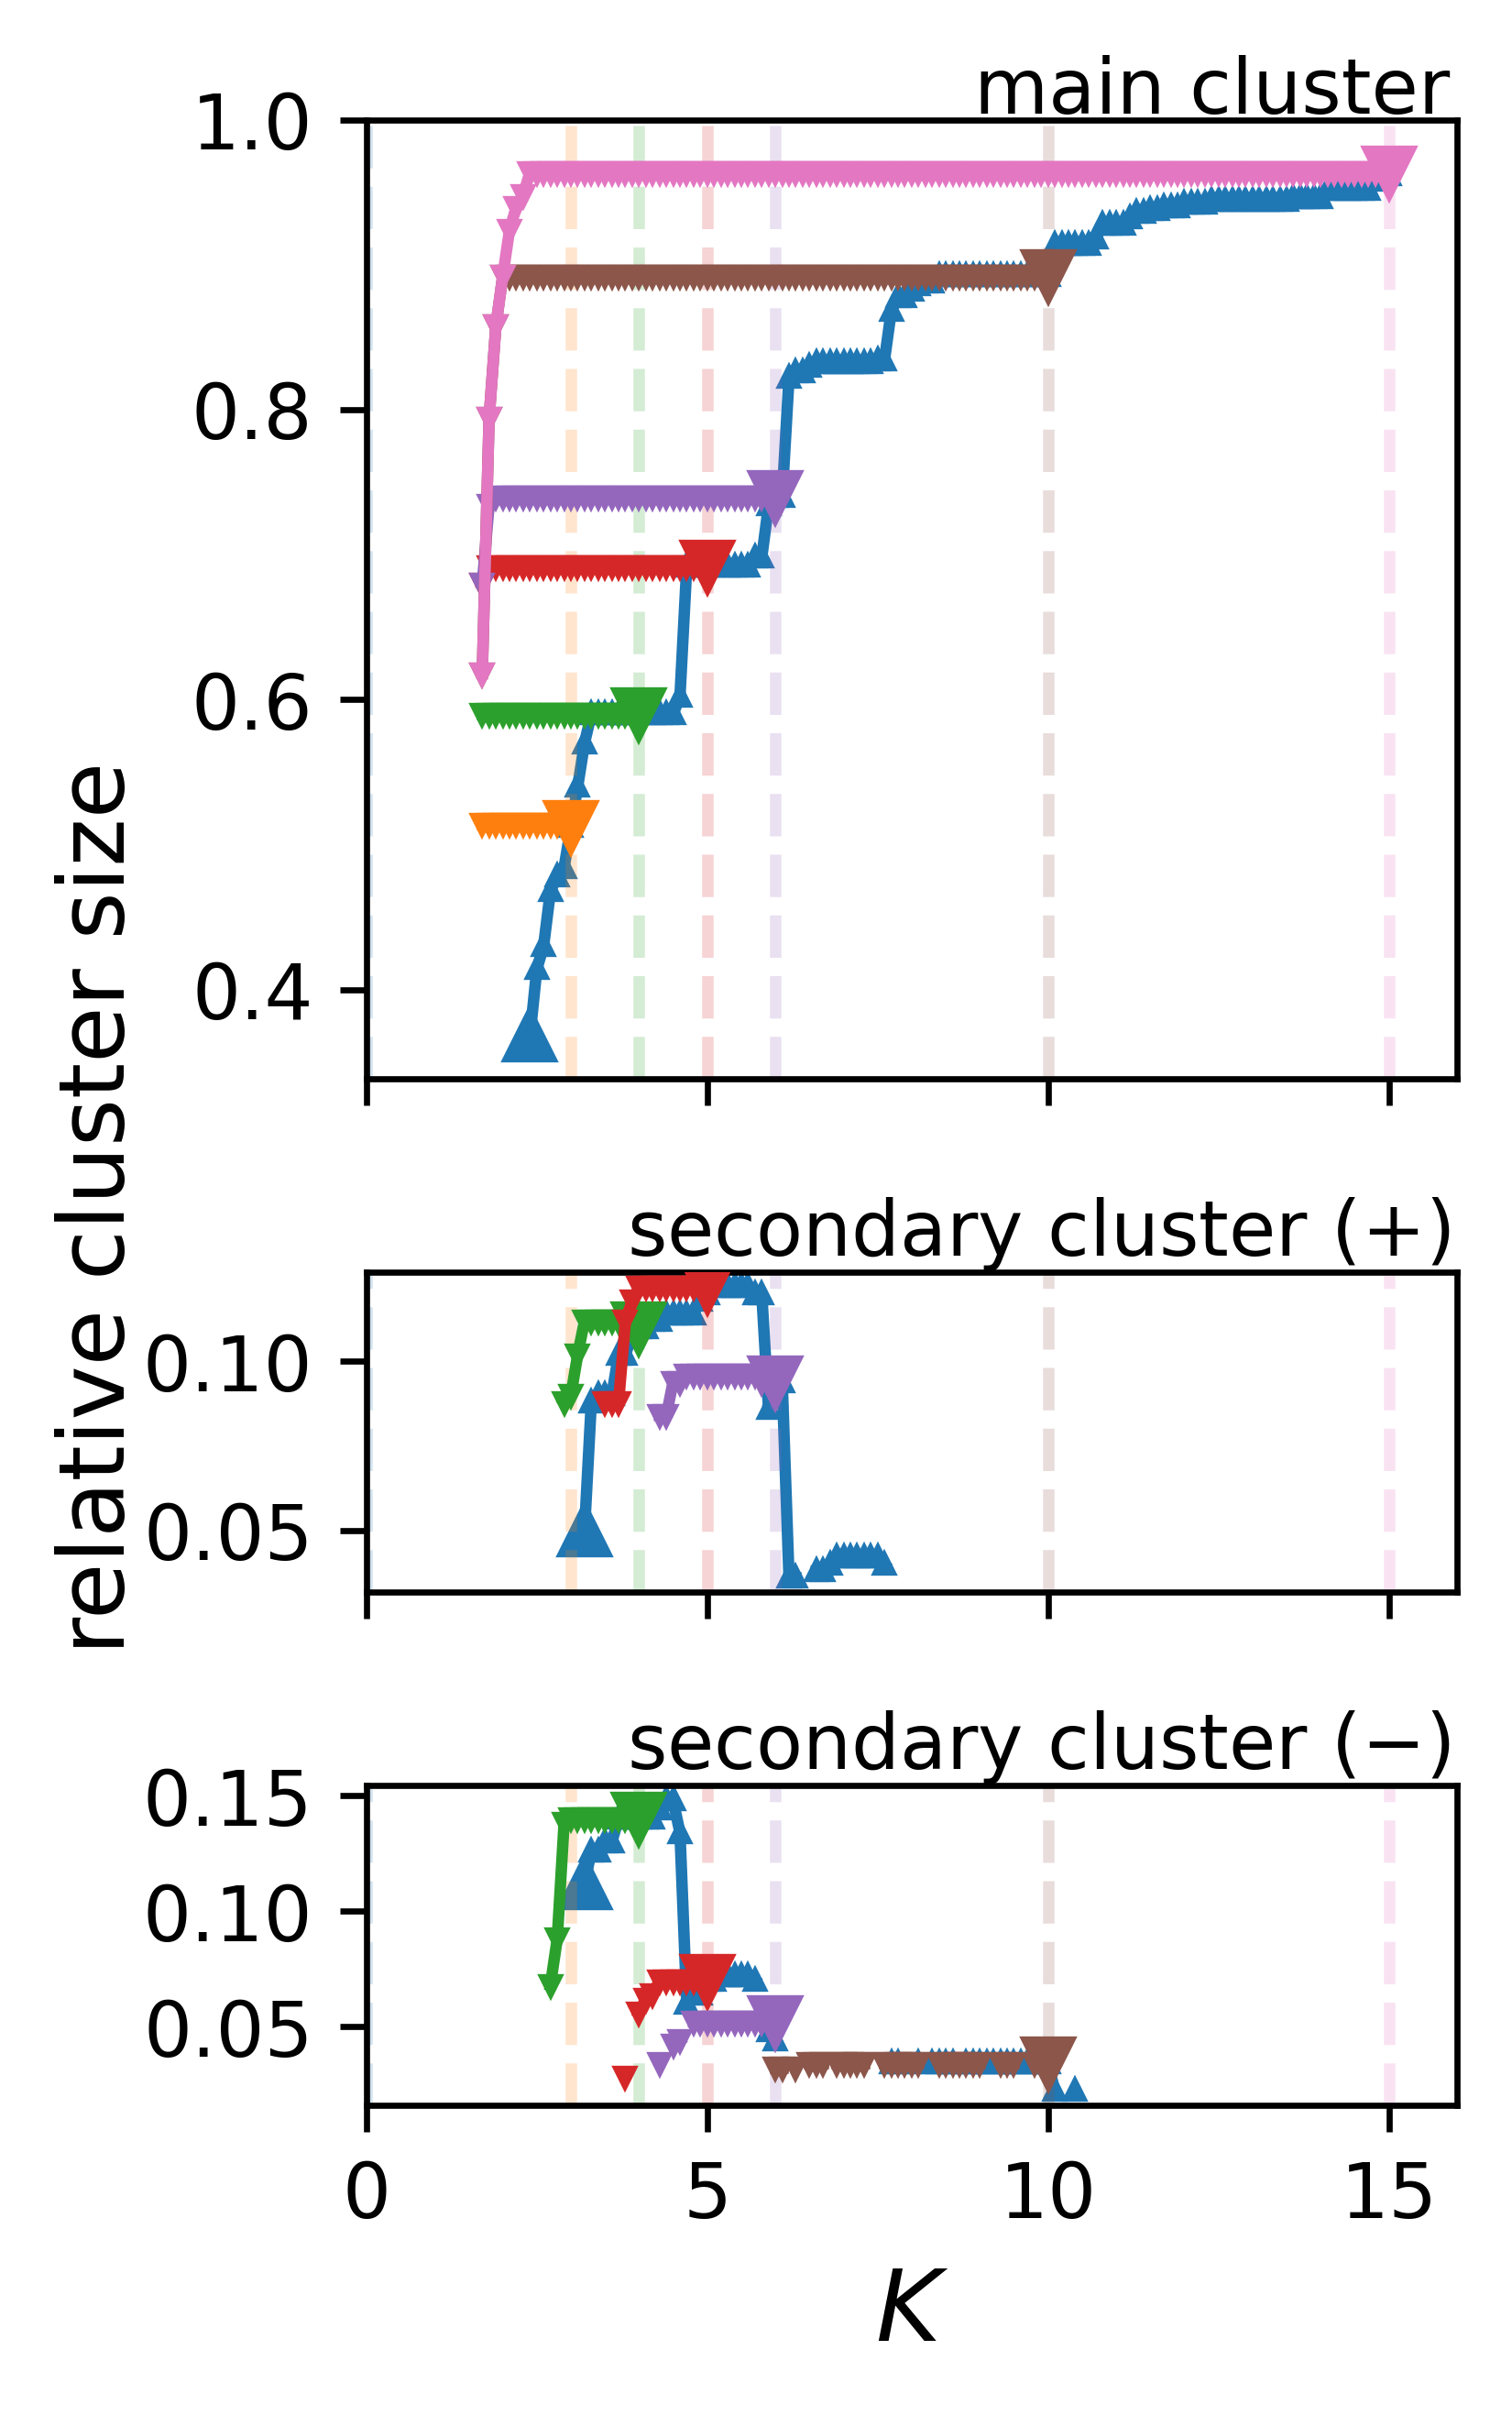

In [257]:
fig  = plt.figure(figsize=(3,4.5),dpi=300)
axs = fig.subplots(3,1,height_ratios=[3,1,1],sharex=True)
ms = df.reset_index().m.unique()
re_df = df.reset_index()
markers = ['^']+['v']*len(K_backs)
d_ = [0]+[-1]*len(K_backs)
# markers = ['.']+[',']*len(K_backs)
TO_DRAW = ['main_s','p_s_0','m_s_0']
TEXT = ['main cluster',r'secondary cluster $(+)$',r'secondary cluster $(-)$']
# for to_d, ax,text in zip(TO_DRAW,axs,TEXT):
num = 0
num_c = 0
plt.sca(ax)
for to_d, ax,text in zip(TO_DRAW,axs,TEXT):
    num = 0
    num_c = 0
    plt.sca(ax)
    for i,(K_back,df_b) in enumerate(list(df_new_dict.items())):

        ms = df_b.reset_index().m.unique()
        re_df = df_b.reset_index()

        df_m = re_df[re_df.m == m_to_draw]
        Ks = df_m.K.to_numpy()
        rs = df_m[to_d].to_numpy()/N
        rstd = df_m.rstd.to_numpy()
        rMM= df_m.rMM.to_numpy()
        plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
        l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num)
        m,=plt.plot(Ks[::1],rs[::1],markers[i],color = tab_color_list[num_c],zorder= num,markersize=2)

        not_nan, = np.where(~np.isnan(rs))
        if len(not_nan)!=0:
            not_nan_first = not_nan[d_[i]] 
            _,=plt.plot(Ks[not_nan_first],rs[not_nan_first],markers[i],color = tab_color_list[num_c],zorder= num,markersize=6)
        num +=1
        num_c +=1
        B_element = (l,m,f)
        B_label = K_back
        B_legends.append(B_element)
        min_,max_ = plt.gca().get_ylim()
    print(min_)
    plt.text(16-0.1,max_,text,horizontalalignment='right',verticalalignment='bottom')

axs[0].set_ylim(0.3382,1)
ax =plt.gca()
# plt.ylim(0,1)
plt.xlim(0,16)



# plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
fig.supylabel(r'relative cluster size',x=0.1)
axs[-1].set_xlabel(r'$K$',fontsize=13)
fig.tight_layout()


In [ ]:
idx_, =np.where(np.isnan(rs))
if idx_

0.3382
0.0317
0.0157


Text(0.5, 0.01, '$K$')

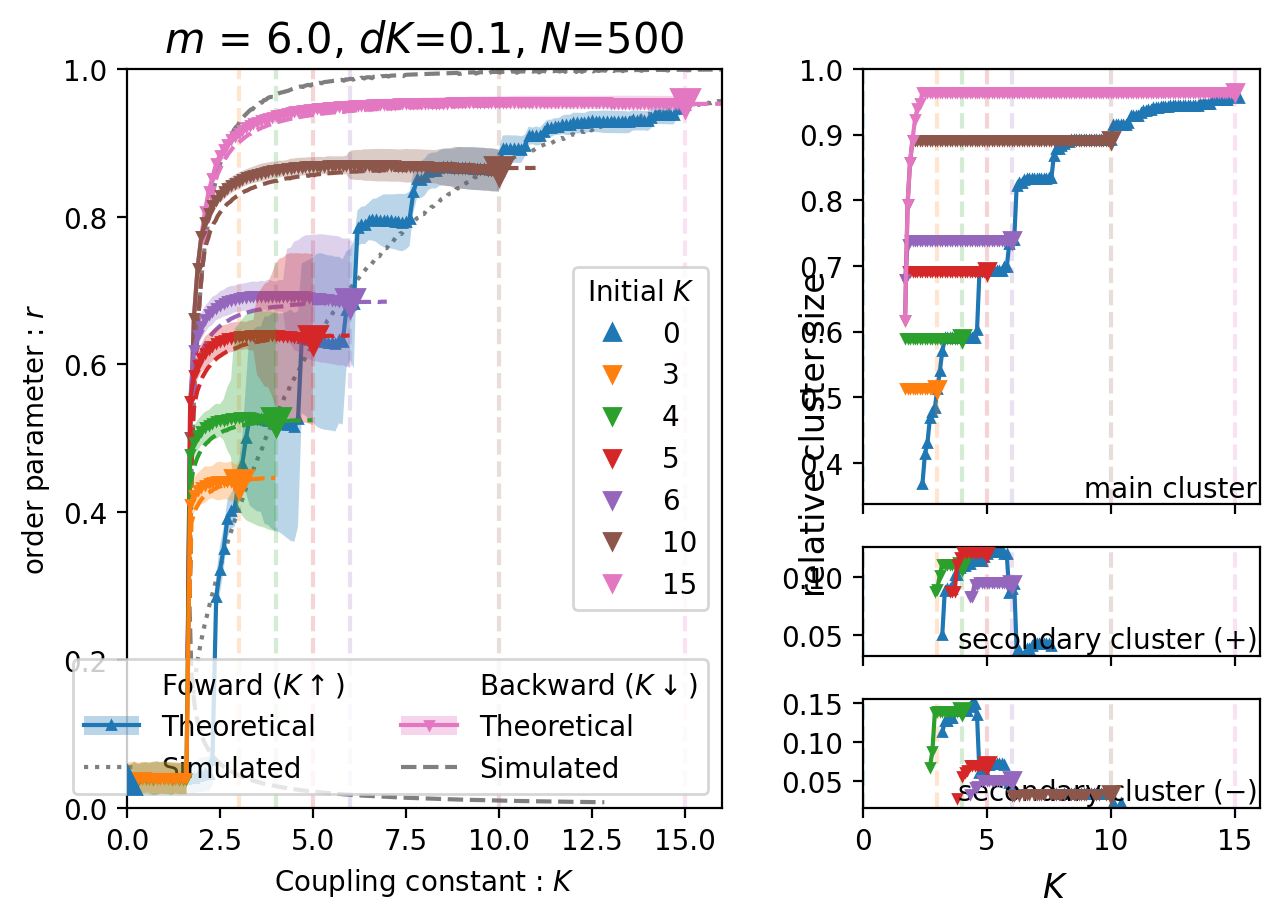

In [255]:
fig = plt.figure()
fig_r,fig_s = fig.subfigures(1,2,wspace=1,width_ratios=[6,4])
ax = fig_r.subplots(1)


ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
plt.sca(ax)
lf,= plt.plot(Ks,rs,'-',label=r'$K_{forward}$',color = 'tab:blue')
_,= plt.plot(Ks[0],rs[0],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=10,zorder=10)
mf,= plt.plot(Ks[:],rs[:],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=3)
ff = plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
plt.legend([(lf,ff)],K_backs,title=f'Backward')

backs_r = []
backs_K = []
num = len(df_b_dick)+1
num_c = 1
B_legends = []
B_legends2 = ()
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    m,=plt.plot(Ks[:],rs[:],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
    _,=plt.plot(Ks[-1],rs[-1],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=10)
    Ku,Ru = U_sets_op_B[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+1] 
        Ru_ = Ru[Ku<K_back+1] 
        plt.plot(Ku_,Ru_,linestyle='--',color = tab_color_list[num_c],zorder= num)
    f=plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
    num -=1
    num_c +=1
    B_element = (l,m,f)
    B_label = K_back
    B_legends.append(B_element)
ax = plt.gca()
plt.legend(B_legends,K_backs,title=f'Backward')#,handler_map={tuple: HandlerTuple(ndivide=None)})



p0, = plt.plot(np.nan,np.nan,'^',color=tab_color_list[0])
p1, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[1])
p2, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[2])
p3, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[3])
p4, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[4])
p5, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[5])
p6, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[6])

string = ', '.join(map(str,K_backs))
ax =plt.gca()

plt.xlim(0,16)
plt.ylim(0,1)
p_F, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
p_B, = plt.plot([0],  marker='None',
        linestyle='None', label='dummy-empty')
categories = ['Theoretical', 'Simulated']

F_, = plt.plot(*KR_underK(F_new,16),':',color ='tab:gray',zorder=0)
B_, = plt.plot(*KR_underK(BU,16),linestyle='--',color = 'tab:gray',zorder=0)
plt.plot(*KR_underK(BO,16),linestyle='--',color = 'tab:gray',zorder=0)
leg3 = plt.legend([p_F,(lf,mf,ff),F_, p_B, (l,m,f), B_],
                    [r'Foward ($K\uparrow$)'] + categories + [r'Backward ($K\downarrow$)'] + categories,
                    loc = 4,ncol=2)
leg_c = plt.legend([p0,p1,p2,p3,p4,p5,p6],[0]+K_backs,loc=5,title=r'Initial $K$')


ax.add_artist(leg3)
plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
plt.ylabel(r'order parameter : $r$')
plt.xlabel(r'Coupling constant : $K$')
# plt.tight_layout()



ms = df.reset_index().m.unique()
re_df = df.reset_index()

axs = fig_s.subplots(3,1,height_ratios=[4,1,1],sharex=True)

markers = ['^']+['v']*len(K_backs)
# markers = ['.']+[',']*len(K_backs)
TO_DRAW = ['main_s','p_s_0','m_s_0']
TEXT = ['main cluster',r'secondary cluster $(+)$',r'secondary cluster $(-)$']
for to_d, ax,text in zip(TO_DRAW,axs,TEXT):
    num = 0
    num_c = 0
    plt.sca(ax)
    for i,(K_back,df_b) in enumerate(list(df_new_dict.items())):

        ms = df_b.reset_index().m.unique()
        re_df = df_b.reset_index()

        df_m = re_df[re_df.m == m_to_draw]
        Ks = df_m.K.to_numpy()
        rs = df_m[to_d].to_numpy()/N
        rstd = df_m.rstd.to_numpy()
        rMM= df_m.rMM.to_numpy()
        plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
        l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
        m,=plt.plot(Ks[::1],rs[::1],markers[i],color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
        _,=plt.plot(Ks[-1],rs[-1],markers[i],color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=6)
        num +=1
        num_c +=1
        B_element = (l,m,f)
        B_label = K_back
        B_legends.append(B_element)
        min_,_ = plt.gca().get_ylim()
    print(min_)
    plt.text(16-0.1,min_,text,horizontalalignment='right',verticalalignment='bottom')
# ax = plt.gca()

axs[0].set_ylim(0.3382,1)
ax =plt.gca()
# plt.ylim(0,1)
plt.xlim(0,16)



# plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
fig_s.supylabel(r'relative cluster size',x=0)
fig_s.supxlabel(r'$K$')
# fig.tight_layout()


0.0157


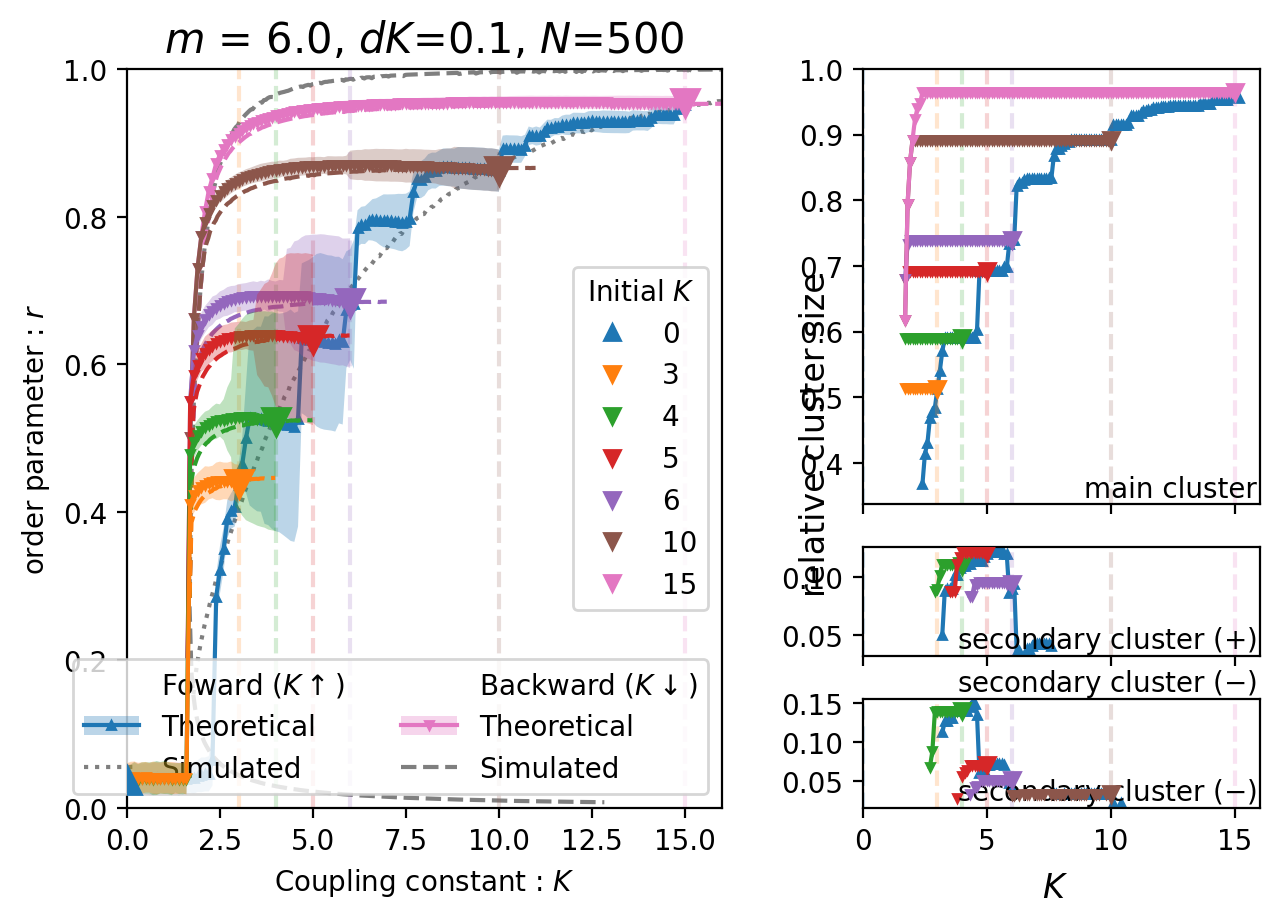

In [254]:
ms = df.reset_index().m.unique()
re_df = df.reset_index()

fig, axs = plt.subplots(3,1,height_ratios=[3,1,1],sharex=True,figsize=(3,4.5),dpi=100)
fig.clear()
markers = ['^']+['v']*len(K_backs)
# markers = ['.']+[',']*len(K_backs)
TO_DRAW = ['main_s','p_s_0','m_s_0']
TEXT = ['main cluster',r'secondary cluster $(+)$',r'secondary cluster $(-)$']
# for to_d, ax,text in zip(TO_DRAW,axs,TEXT):
num = 0
num_c = 0
plt.sca(ax)
print(min_)
plt.text(16-0.1,max_,text,horizontalalignment='right',verticalalignment='bottom')
# ax = plt.gca()

axs[0].set_ylim(0.3382,1)
ax =plt.gca()
# plt.ylim(0,1)
plt.xlim(0,16)



# plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
fig.supylabel(r'relative cluster size',x=0.1)
axs[-1].set_xlabel(r'$K$',fontsize=13)
fig.tight_layout()


### check detail

In [ ]:
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
max_c = 3e-4

In [ ]:
def make_new_df(K_start,m_start,N = 500):
    cols ={'r':[0],'rmin':[0],'rmax':[0],'rstd':[0],'rMM':[0],'error':[0]}
    theta_col = []
    dtheta_col = []
    for i in range(10):
        cols[f'c{i}'] = np.nan
    for i in range(10):
        cols[f'c{i} phase vel'] = np.nan
    for i in range(10):
        cols[f'c{i} omega'] = np.nan
    for i in range(10):
        cols[f'c{i} list'] = np.nan

    for i in range(N):
        s = 'theta'+f'{i}'.zfill(3)
        theta_col.append(s)
        cols[s]= np.nan

    for i in range(N):
        s = 'dtheta'+f'{i}'.zfill(3)
        dtheta_col.append(s)
        cols[s]= np.nan
    cols['avg_dtheta']= np.nan
    cols['K'] = K_start
    cols['m'] = m_start
    df = pd.DataFrame(columns=cols.keys())
    df_Km = df.set_index(['K','m'])
    for i in range(10):
        df_Km[f'c{i} list'] =df_Km[f'c{i} list'].astype(object)
    df_Km['avg_dtheta'] = df_Km['avg_dtheta'].astype(object)
    return df_Km,theta_col,dtheta_col

In [ ]:
def hysterisis(df_Km,sets,theta_col,dtheta_col,K,m,N,omega):
    theta,dtheta,rs = sets
    r_duration = rs[-5000:]
    r = np.mean(r_duration,axis=0)
    rmin = np.min(r_duration,axis=0)
    rmax = np.max(r_duration,axis=0)
    rstd = np.std(r_duration,axis=0)
    rMM = (np.max(r_duration,axis=0)-np.min(r_duration,axis=0))

    sum_time = 1500
    dtheta_c = np.cumsum(dtheta,axis=0)
    avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

    c_threshold = np.where(r<0.05,1e-5,max_c)
    CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(AVG=avg_dtheta,check=c_threshold,c_size=5,N=N,omega=omega)
    dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
    dtype2 = [('cluster size', int), ('cluster mean natural frequency', float)]
    CSMP = np.array([(S,P) for S,P in zip(CS,CMP)],dtype=dtype)
    CSMO = np.array([(S,O) for S,O in zip(CS,CMO)],dtype=dtype2)
    cluster = np.array(cluster)
    last_theta = theta[-1]
    last_dtheta = dtheta[-1]
    df_Km.loc[(K,m),"r"] = r
    df_Km.loc[(K,m),"rmin"] = rmin
    df_Km.loc[(K,m),"rmax"] = rmax
    df_Km.loc[(K,m),"rstd"] = rstd
    df_Km.loc[(K,m),"rMM"] = rMM
    df_Km.loc[(K,m),'error'] = np.nan
    for i in range(len(CSMO)):
        df_Km.loc[(K,m),f'c{i}'] = CSMP['cluster size'][i]
        df_Km.loc[(K,m),f'c{i} phase vel'] = CSMP['cluster mean phase velocity'][i]
        df_Km.loc[(K,m),f'c{i} omega'] = CSMO['cluster mean natural frequency'][i]
        df_Km.loc[(K,m),f'c{i} list'] = ' '.join(map(str,cluster[i]))
    df_Km.loc[(K,m),'avg_dtheta'] = ' '.join(map(str,avg_dtheta[-1]))
    df_Km.loc[(K,m),theta_col] = last_theta
    df_Km.loc[(K,m),dtheta_col] = last_dtheta
    return (last_theta,last_dtheta)

In [ ]:
def TLO(m,theta_init,dtheta_init,omega,Ks,N,t_end=500,dt = 0.1):
    df_Km,theta_col,dtheta_col = make_new_df(0,m,N = N)
    t = np.arange(0,t_end,dt)
    K = Ks[0]
    theta_dict = {}
    dtheta_dict = {}

    theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_init,p_dtheta= dtheta_init,p_omega=omega,result_time = int((t_end)-(350))*int(1/dt))
    theta_dict[K] = theta
    dtheta_dict[K] = dtheta
    if m == 0:
        dtheta = np.c_[dtheta[0],dtheta.T].T
    last_theta,last_dtheta = hysterisis(df_Km,(theta, dtheta,rs),theta_col,dtheta_col,K,m,N,omega)
    for K in Ks[1:]:
        theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=last_theta,p_dtheta= last_dtheta,p_omega=omega,result_time = int((t_end)-(350))*int(1/dt))
        theta_dict[K] = theta
        dtheta_dict[K] = dtheta
        if m == 0:
            dtheta = np.c_[dtheta[0],dtheta.T].T
        last_theta,last_dtheta = hysterisis(df_Km,(theta, dtheta,rs),theta_col,dtheta_col,K,m,N,omega)
    return df_Km,theta_dict,dtheta_dict

In [267]:
seed = 10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) - np.mean(omega)
ms = np.arange(0,10+0.05,0.1)
K = 0
m = 0
dK = 0.1
K_end = 15
Ks = np.arange(0,K_end+dK/2,dK)

df_Km,theta_col,dtheta_col = make_new_df(0,m,N = N)
df_Km = df_Km.reset_index()

In [268]:
df_Km,theta_dict,dtheta_dict = TLO(6,theta_init=theta_init,dtheta_init = 0*omega,omega=omega,Ks=Ks,N=N,t_end=1000,dt = 0.1)

In [269]:
rstds = df_Km.reset_index()['rstd'].to_numpy()
Ks = df_Km.reset_index()['K'].to_numpy()
rs = df_Km.reset_index()['r'].to_numpy()
arg = np.argsort(rstds)[::-1]

In [270]:
Ks[np.argmax(rstds)]

4.4

In [271]:
np.where(rs<0.15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),)

In [272]:
def Draw_Kr_idxs(m,idxs,ax,rs,rstds,Ks):
    data_rs = rs[idxs]
    data_rstd = rstds[idxs]
    data_Ks = Ks[idxs]
    plt.sca(ax)

    err_fw = plt.errorbar(data_Ks,data_rs,data_rstd,fmt='.',color='tab:red',zorder=2,capsize=4,elinewidth=2,capthick=3,ms=10)

In [ ]:
plt.plot(np.array(df_Km['avg_dtheta'].loc[(Ks[arg][0],6)].split(' '),dtype=float))

In [ ]:
rs[23]

In [ ]:
theta_dict.keys()

In [ ]:
2.3000000000000003

In [ ]:
fig = plt.figure(figsize=(12,3.5),dpi=300)
axs = fig.subplots(1,3,sharex=True,sharey=True)
K_wants = [2.3000000000000003,4.4,15.0]
for K_want,ax in zip(K_wants,axs[:3]):
    plt.sca(ax)
    theta = theta_dict[K_want]
    rs = np.abs(1/N * np.sum(np.exp(1j*theta),axis=1))
    A = np.mean(rs)
    A_min = np.searchsorted(rs[:100],A)
    seg_theta = theta[A_min]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,origin='lower',cmap = 'seismic',aspect=1,extent=[1,500,1,500])

    plt.xticks([1,500])
    plt.yticks([1,500])
    plt.title(r'$K$='+f'{K_want:.1f}',fontsize=13,loc='right')


plt.sca(axs[0])
# plt.xlabel('Desynchronized',y=0.3)
plt.text(250,-10,'Desynchronized',horizontalalignment='center', verticalalignment='top',fontsize=14)
plt.sca(axs[1])
plt.text(250,-10,r'The largest $\sigma$',horizontalalignment='center', verticalalignment='top',fontsize=14)
plt.sca(axs[2])
plt.text(250,-10,r'The smallest $\sigma$',horizontalalignment='center', verticalalignment='top',fontsize=14)

# plt.xlabel(r'The smallest $\sigma$',y=0.3)
# plt.ylabel(r'$j^{th}$ oscillator',fontsize=13)
plt.subplots_adjust(wspace=0.1)
cbar = plt.colorbar(im,ax=axs,shrink=0.8)
cbar.set_label(r'$\sin(\theta_j-\theta_i)$',fontsize=13)
plt.sca(axs[1])
plt.xlabel(r'$i^{th}$ oscillator',fontsize=13)
fig.supylabel(r'$j^{th}$ oscillator',fontsize=13,x=0.1)
# plt.tight_layout()

In [ ]:
rstds50

In [ ]:
plt.plot(rstds)

In [ ]:
data_rstd

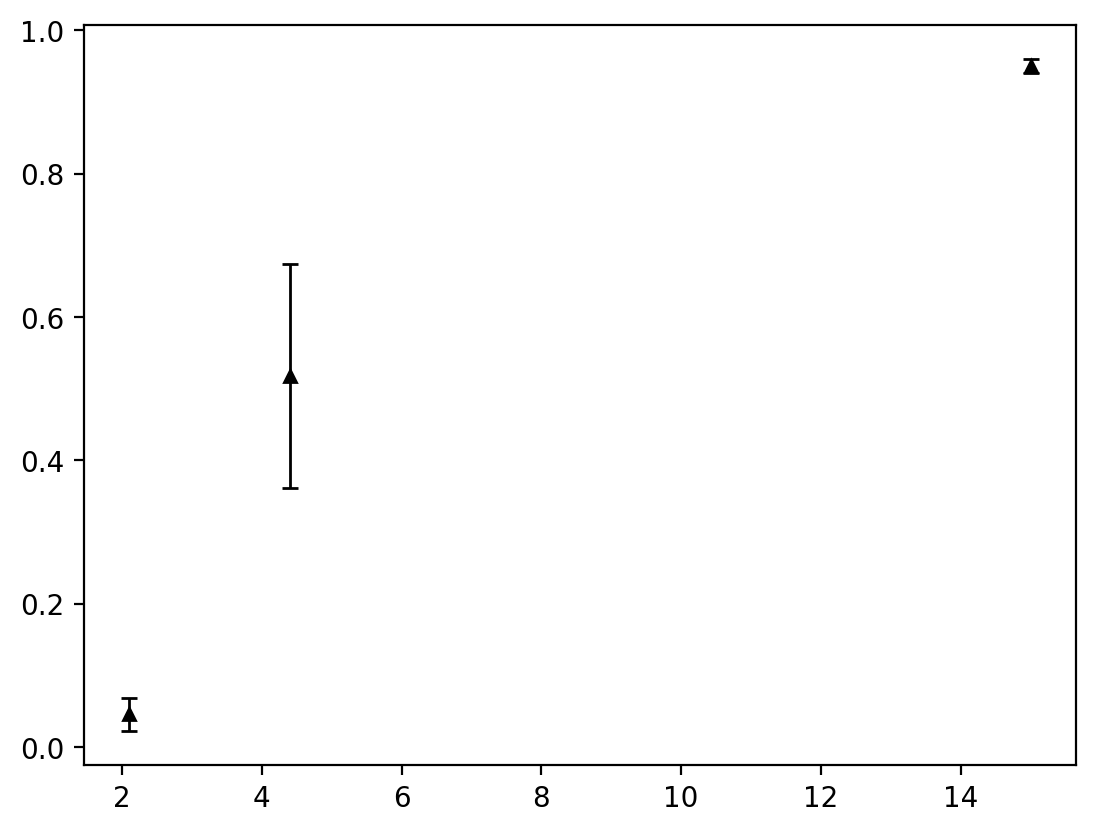

In [259]:
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()

idxs = np.array([21,44,150])
data_rs = rs[idxs]
data_rstd = rstds[idxs]
data_Ks = Ks[idxs]


err_fw = plt.errorbar(data_Ks,data_rs,data_rstd,fmt='^',color='black',zorder=20,capsize=3,elinewidth=1,capthick=1,ms=4)

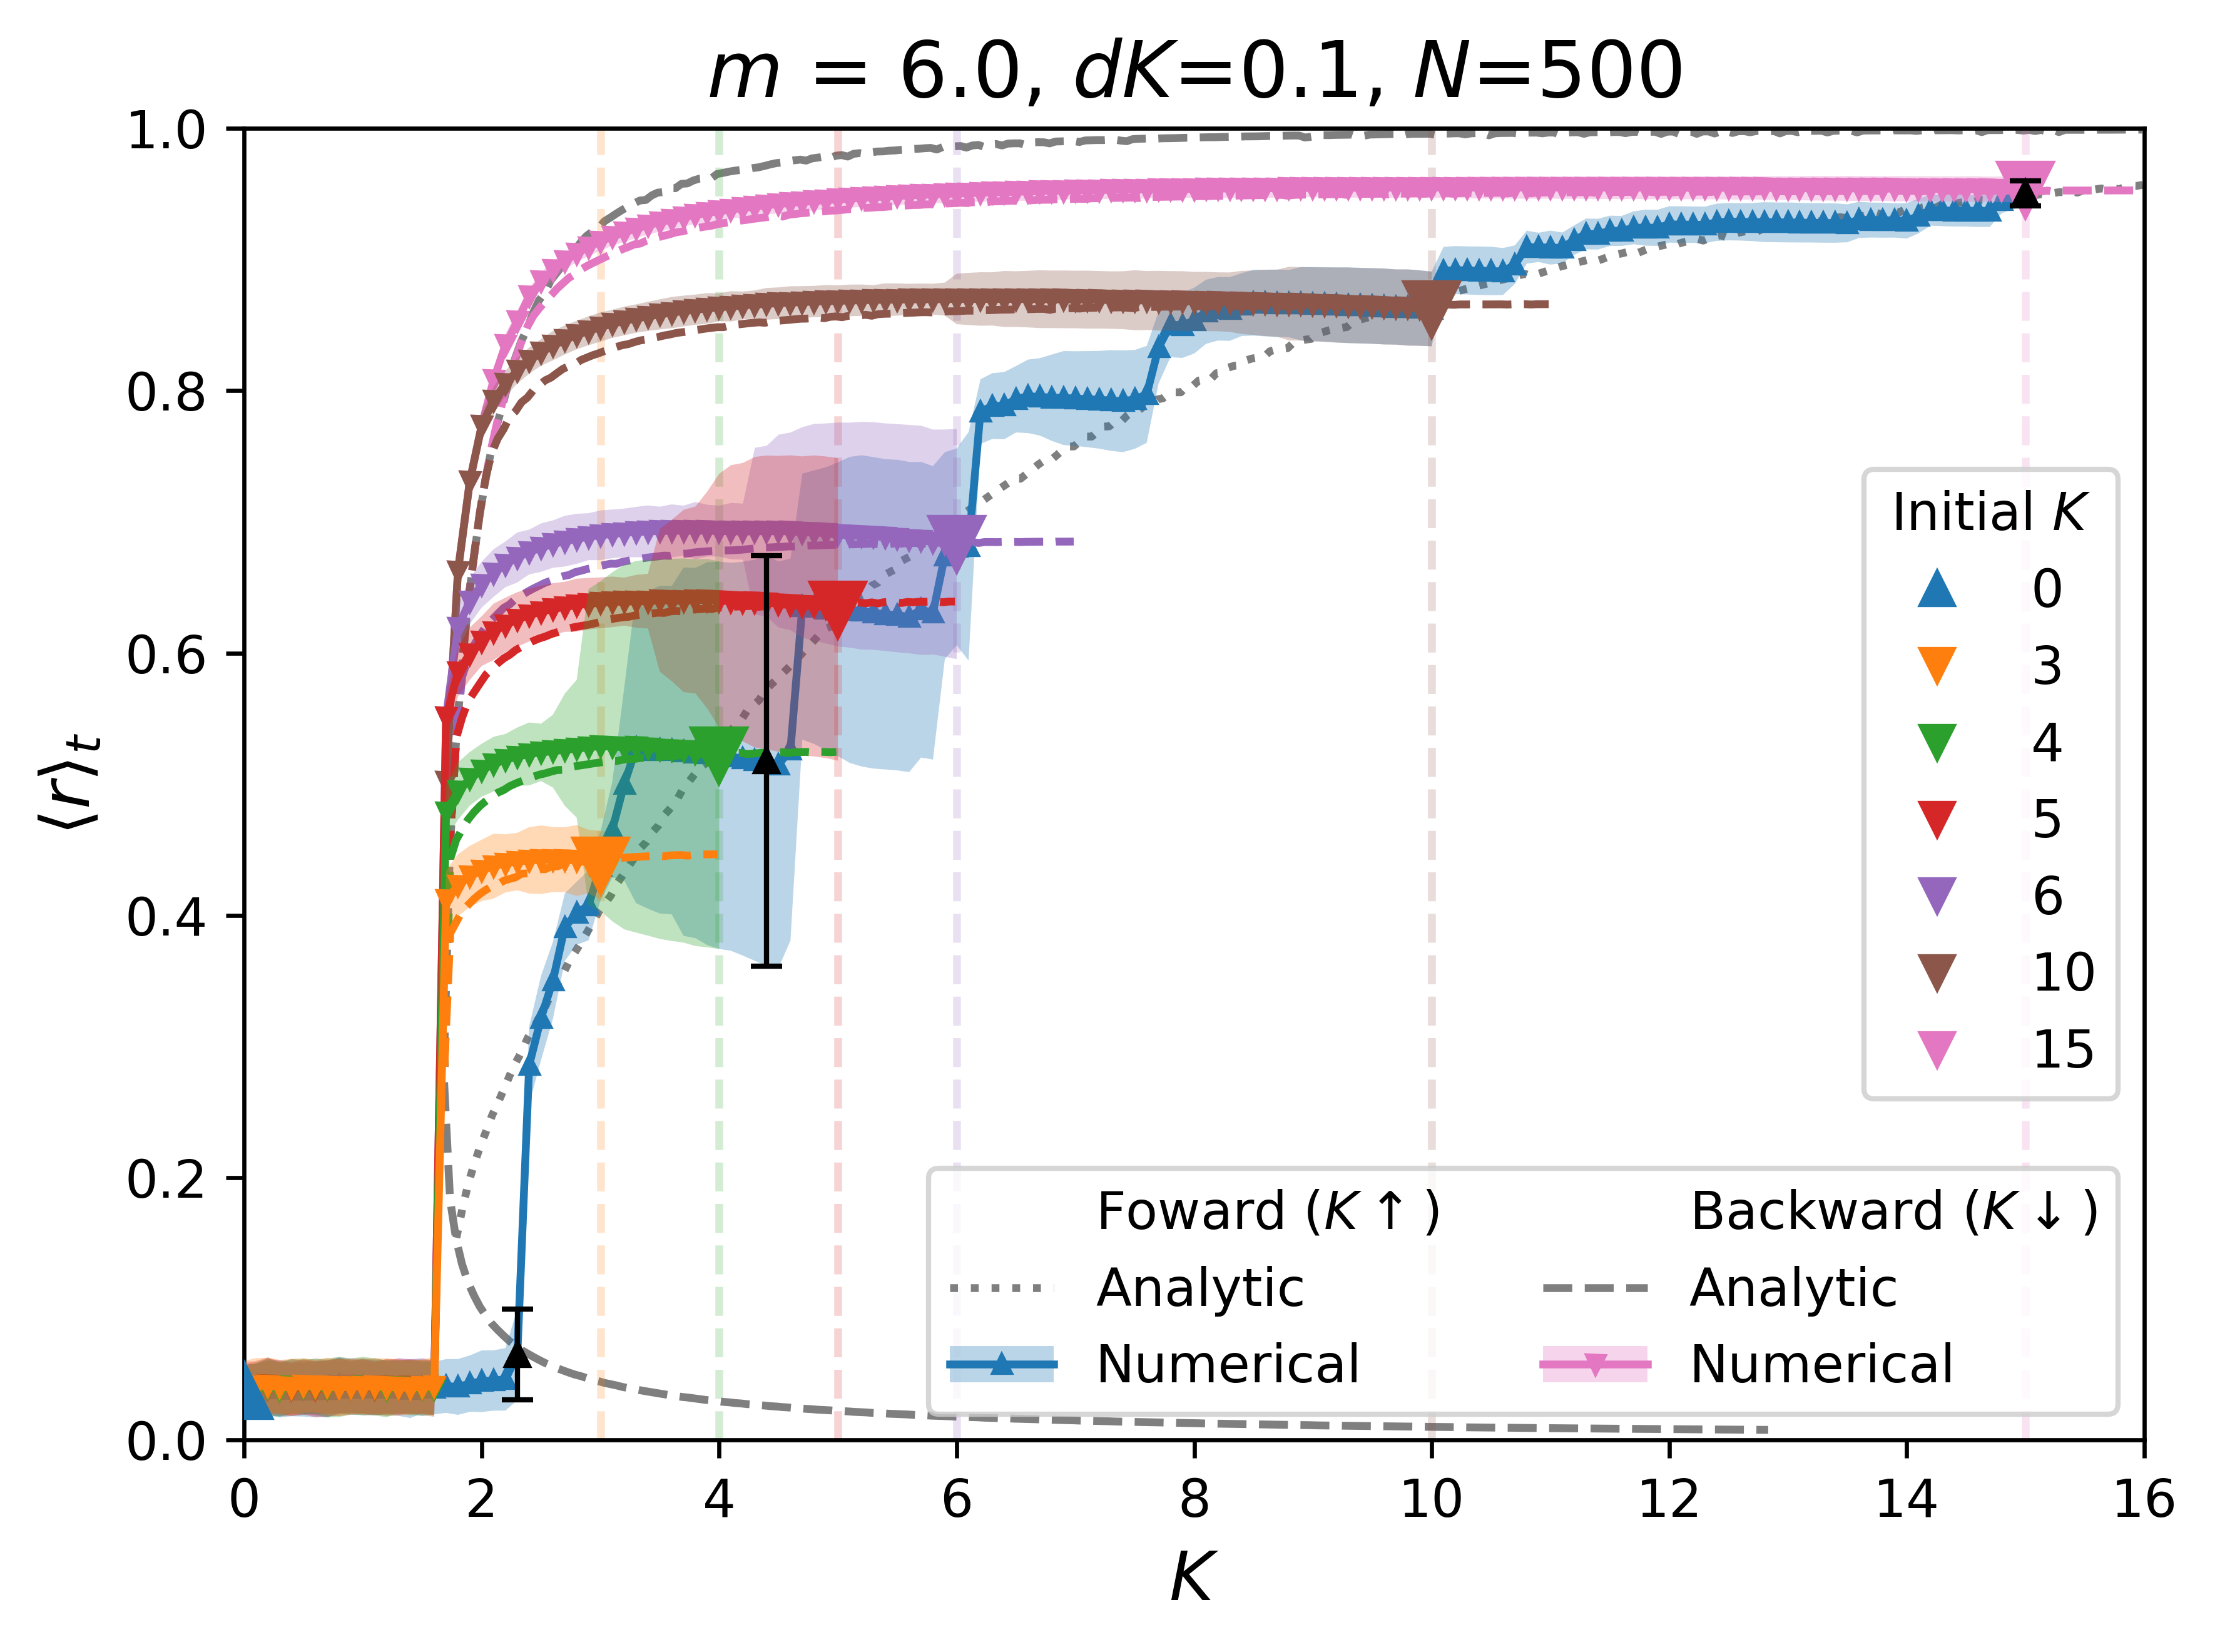

In [263]:
plt.figure(figsize=(6,4.5),dpi=300)
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()


idxs = np.array([23,44,150])
data_rs = rs[idxs]
data_rstd = rstds[idxs]
data_Ks = Ks[idxs]


err_fw = plt.errorbar(data_Ks,data_rs,data_rstd,fmt='^',color='black',zorder=20,capsize=3,elinewidth=1,capthick=1,ms=4)


lf,= plt.plot(Ks,rs,'-',label=r'$K_{forward}$',color = 'tab:blue')
_,= plt.plot(Ks[0],rs[0],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=10,zorder=10)
mf,= plt.plot(Ks[:],rs[:],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=3)
ff = plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
plt.legend([(lf,ff)],K_backs,title=f'Backward')

backs_r = []
backs_K = []
num = len(df_b_dick)+1
num_c = 1
B_legends = []
B_legends2 = ()
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    m,=plt.plot(Ks[:],rs[:],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
    _,=plt.plot(Ks[-1],rs[-1],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=10)
    Ku,Ru = U_sets_op_B[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+1] 
        Ru_ = Ru[Ku<K_back+1] 
        plt.plot(Ku_,Ru_,linestyle='--',color = tab_color_list[num_c],zorder= num)
    f=plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
    num -=1
    num_c +=1
    B_element = (l,m,f)
    B_label = K_back
    B_legends.append(B_element)
ax = plt.gca()
plt.legend(B_legends,K_backs,title=f'Backward')#,handler_map={tuple: HandlerTuple(ndivide=None)})



p0, = plt.plot(np.nan,np.nan,'^',color=tab_color_list[0])
p1, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[1])
p2, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[2])
p3, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[3])
p4, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[4])
p5, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[5])
p6, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[6])

string = ', '.join(map(str,K_backs))
ax =plt.gca()

plt.xlim(0,16)
plt.ylim(0,1)
p_F, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
p_B, = plt.plot([0],  marker='None',
        linestyle='None', label='dummy-empty')
categories = ['Analytic','Numerical']

F_, = plt.plot(*KR_underK(F_new,16),':',color ='tab:gray',zorder=0)
B_, = plt.plot(*KR_underK(BU,16),linestyle='--',color = 'tab:gray',zorder=0)
plt.plot(*KR_underK(BO,16),linestyle='--',color = 'tab:gray',zorder=0)
leg3 = plt.legend([p_F,F_,(lf,mf,ff), p_B,  B_,(l,m,f)],
                    [r'Foward ($K\uparrow$)'] + categories + [r'Backward ($K\downarrow$)'] + categories,
                    loc = 4,ncol=2)
leg_c = plt.legend([p0,p1,p2,p3,p4,p5,p6],[0]+K_backs,loc=5,title=r'Initial $K$')


ax.add_artist(leg3)
plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
plt.ylabel(r'$\langle$$r$$\rangle$$_t$',fontsize=13)
plt.xlabel(r'$K$',fontsize=13)
plt.tight_layout()


In [ ]:
fig = plt.figure(figsize=(6,8))
fig_ij,fig_c = fig.subfigures(2,1,height_ratios=[3,1])
axs =fig_c.subplots(1,3)
ax_ij = fig_ij.subplots(1,1)
fig_c.subplots_adjust(wspace=0.3)
ax_ij.axis('off')

plt.sca(ax_ij)
plt.xticks([])
plt.yticks([])
K_want = 4.4
theta = theta_dict[K_want]
rs = np.abs(1/N * np.sum(np.exp(1j*theta),axis=1))
A = np.mean(rs)
A_min = np.searchsorted(rs[:100],A)
seg_theta = theta[A_min]
i,j = np.meshgrid(seg_theta,seg_theta)
im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,origin='lower',cmap = 'seismic',aspect=1,extent=[1,500,1,500])

In [ ]:
plt.figure(figsize=(2.5,2.5),dpi=500)
K_want = 4.4
theta = theta_dict[K_want]
rpsi = 1/N * np.sum(np.exp(1j*theta),axis=1)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
A = np.mean(rs)
A_min = np.searchsorted(rs[:100],A)
seg_theta = theta[A_min]
i,j = np.meshgrid(seg_theta,seg_theta)
im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,origin='lower',cmap = 'seismic',aspect=1,extent=[1,500,1,500])
for clu,color in zip([c0,c1,c2],colors):
    min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
    cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
    cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
    cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
    cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
ax.set_title(r'$K$= 4.4',loc='right')
# ax.set_title('(4c)',loc='left')
plt.tight_layout()


In [ ]:
dtheta = dtheta_dict[K_want]
n_dtheta = dtheta / np.max(abs(dtheta))
def time_oscillator(i):
    norm = n_dtheta[i]
    A = (1 + (norm)/2)
    theta_ = theta[i]- psi[i]
    sin,cos = A*np.sin(theta_+np.pi/2), A*np.cos(theta_+np.pi/2)
    
    return cos,sin,norm,np.cos(theta_+np.pi/2),np.sin(theta_+np.pi/2)

In [ ]:
df_Km.columns[:50]

In [ ]:
c0 = np.array(df_Km.loc[(K_want,6)]['c0 list'].split(' '),dtype=int)
c1 = np.array(df_Km.loc[(K_want,6)]['c1 list'].split(' '),dtype=int)
c2 = np.array(df_Km.loc[(K_want,6)]['c2 list'].split(' '),dtype=int)

c0_p = np.array(df_Km.loc[(K_want,6)]['c0 phase vel'])
c1_p = np.array(df_Km.loc[(K_want,6)]['c1 phase vel'])
c2_p = np.array(df_Km.loc[(K_want,6)]['c2 phase vel'])

In [ ]:
c1_p

In [ ]:
c_ = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(c_),'y':np.sin(c_)
}

In [ ]:
CLU = np.concatenate([c0,c1,c2])
not_CLU = np.setdiff1d(np.arange(N),CLU)


In [ ]:
import matplotlib.colors as mcl

In [ ]:
tod = rs[:100]
A = np.array([np.argmin(tod),np.searchsorted(tod,np.mean(tod)),np.argmax(tod)])

In [ ]:
plt.cm.coolwarm(0)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_2599/295983.py:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_2599/295983.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
/v

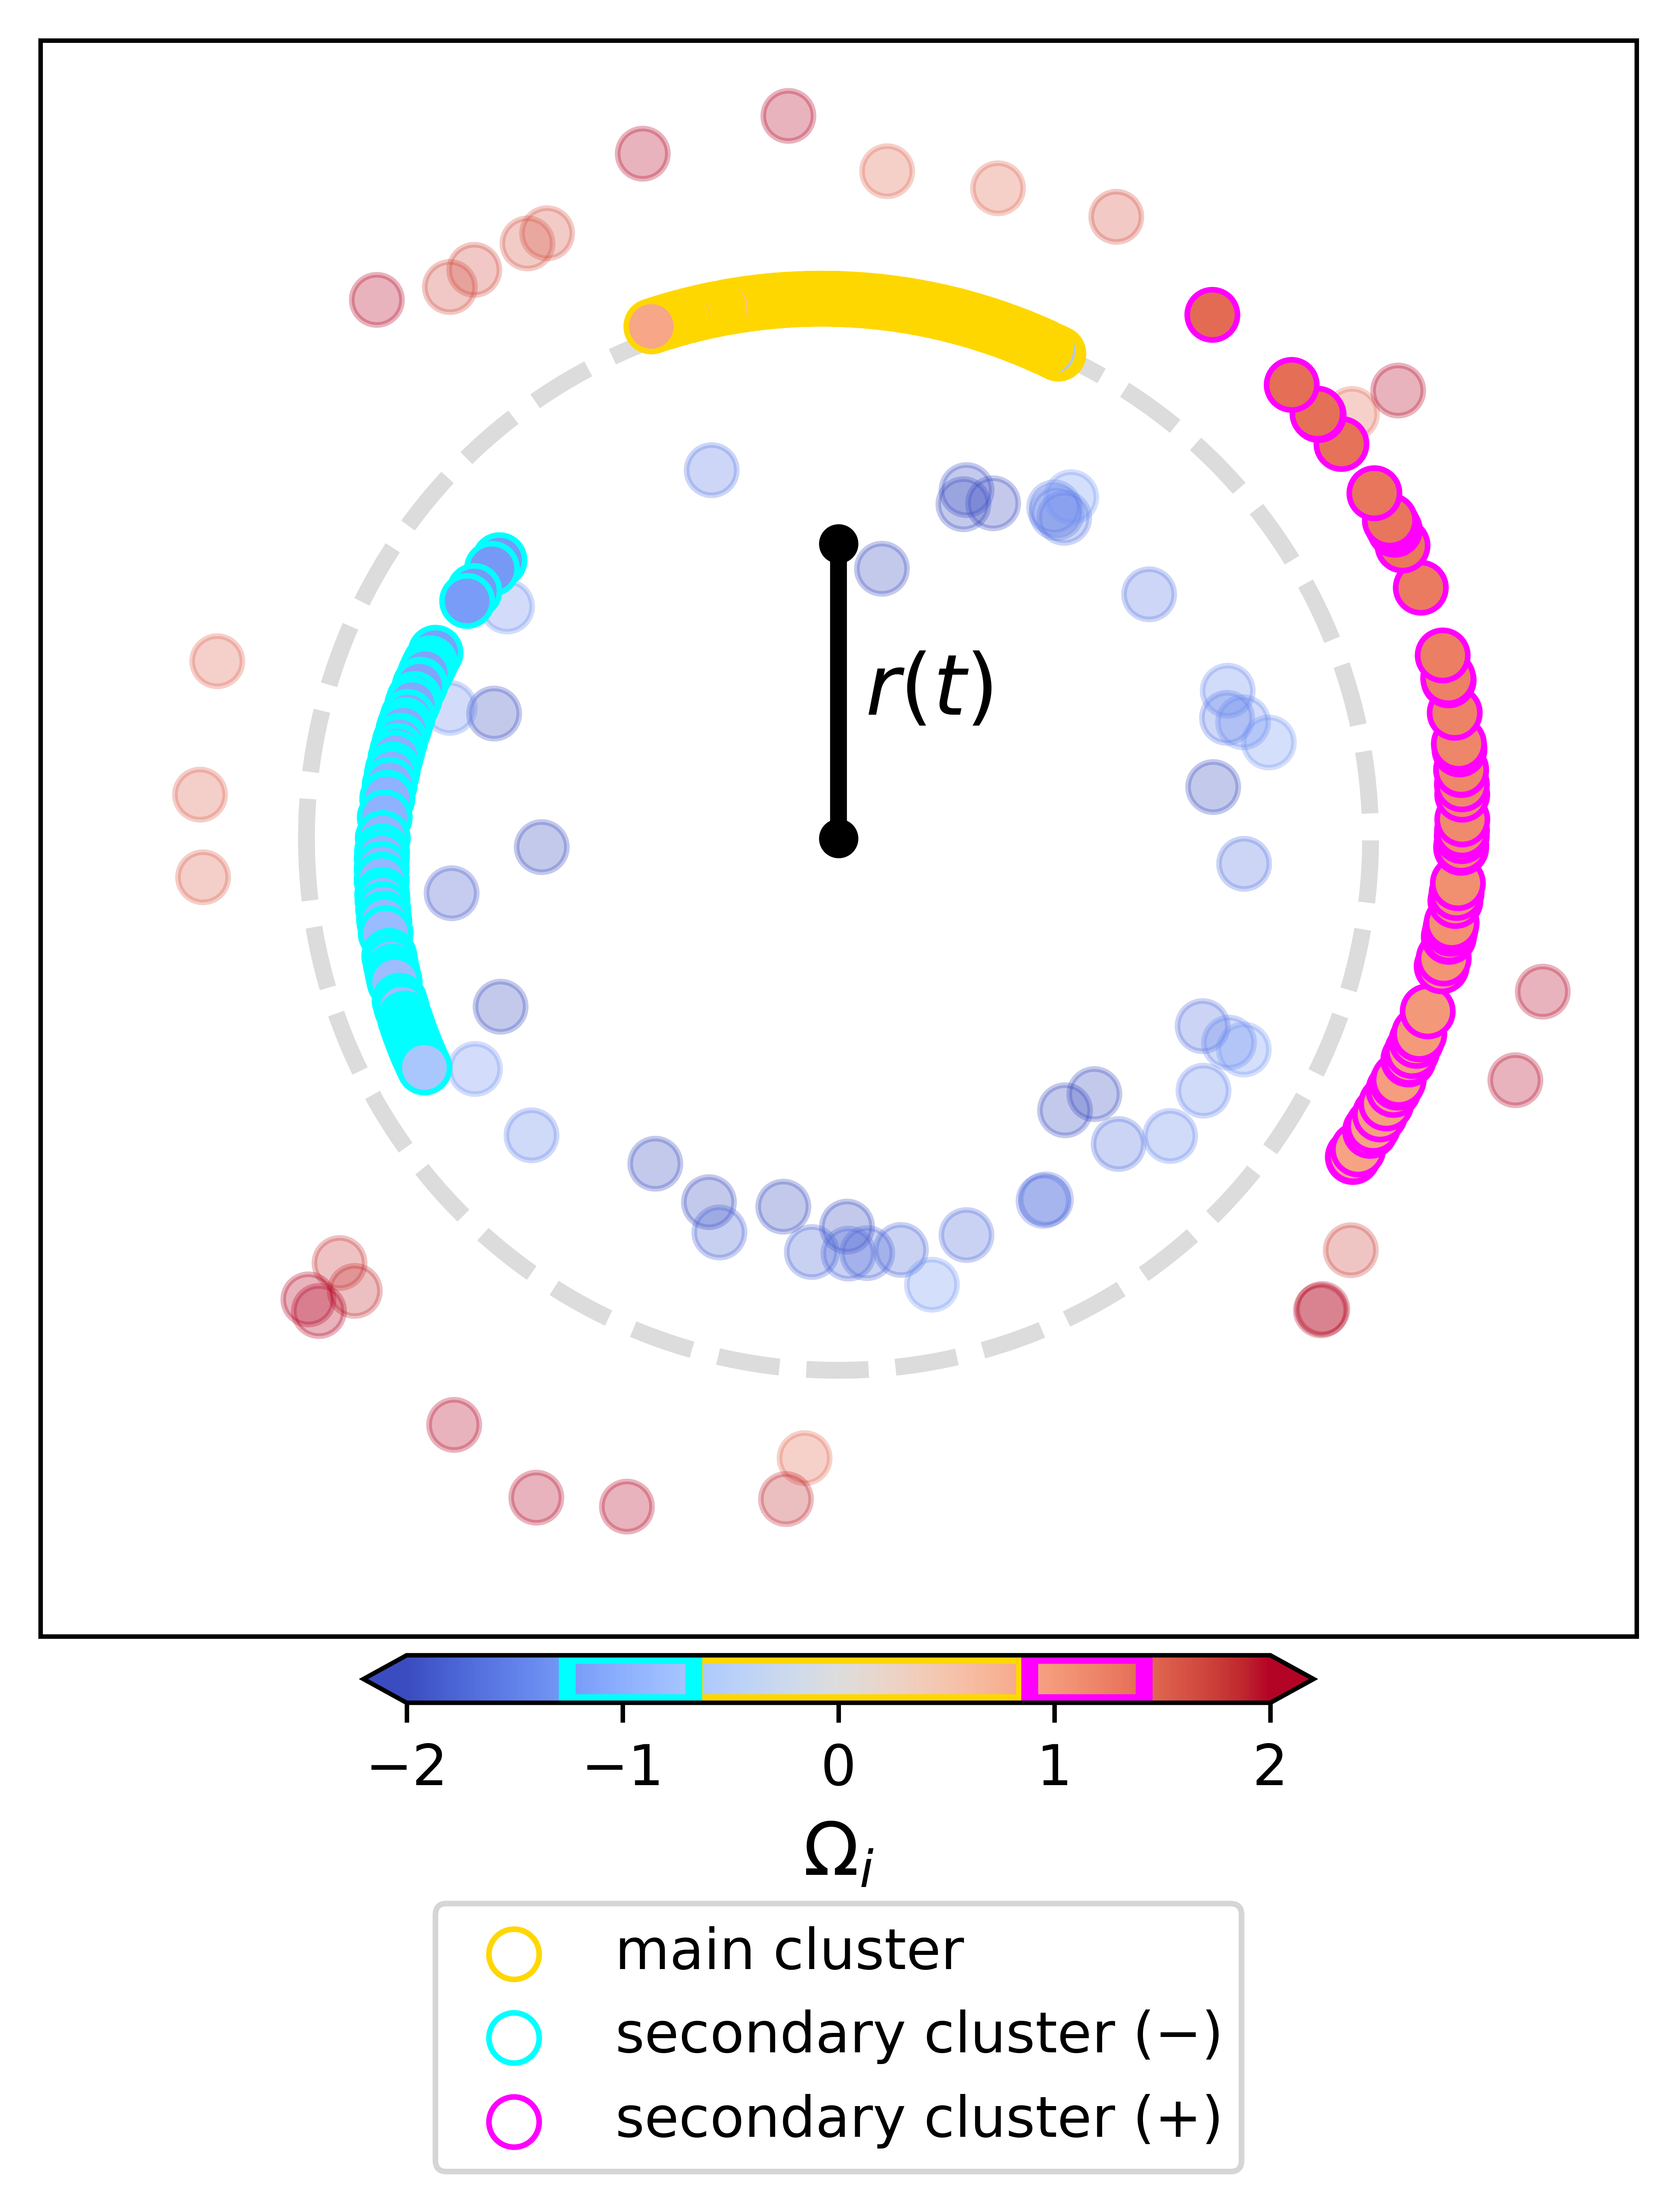

In [214]:
i = A[1]
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=500,facecolor=(1,1,1,0))

# colors = ['gold','darkslateblue','darkred']
colors = ['gold','aqua','fuchsia']
X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r(t)$',horizontalalignment='left', verticalalignment='center',fontsize=15)
cmap = 'coolwarm'#'Spectral'#'viridis'#
s = 100
data = {
    'x': X[not_CLU],'y':Y[not_CLU],
    'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
    'cmap':cmap,
    # 'c': colors,#omega,'cmap':'YlOrRd',
}
cax_ = ax.scatter(**data,zorder=1)
alpha = 1
alpha_text = f'{round(alpha*255):02x}'
for clu,color in zip([c0,c1,c2],colors):
    data = {
        'x': X[clu],'y':Y[clu],
        'c': omega[clu],'cmap':cmap,
        'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
    cax = ax.scatter(**data,zorder=1)


ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
# ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
plt.gca().set_aspect('equal')
cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
# cbar.ax.plot([0,1],[1]*2,'w')
for clu,color in zip([c0,c1,c2],colors):
    min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
    cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
    cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
    cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
    cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.353))
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

In [ ]:
plt.cm.coolwarm(0.5)
plt.cm.coolwarm(0.3)
plt.cm.coolwarm(0.7)[:3]

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=100,facecolor=(1,1,1,0))
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor((1,1,1,0))

In [ ]:
i = A[1]
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 10),dpi=100,facecolor=(1,1,1,0))
for ax,p_ in zip(axs,[+5,10]):
    i = A[1]+p_
    colors = ['gold','darkslateblue','darkred']
    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
    # ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
    cmap = 'coolwarm'#'Spectral'#'viridis'#
    s = 100
    data = {
        'x': X[not_CLU],'y':Y[not_CLU],
        'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
        'cmap':cmap,
        # 'c': colors,#omega,'cmap':'YlOrRd',
    }
    cax_ = ax.scatter(**data,zorder=1)
    alpha = 1
    alpha_text = f'{round(alpha*255):02x}'
    for clu,color in zip([c0,c1,c2],colors):
        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)
    if p_<0:
        text_ = r'$t=t_i-$'+f'{abs(p_)}'
    else:
        text_ = r'$t=t_i+$'+f'{abs(p_)}'

    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    # ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor((1,1,1,0))
    ax.text(1.4,1.4,text_,horizontalalignment='right', verticalalignment='top',fontsize=25)
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
    plt.tight_layout()
    

    # ax = plt.gca()
    ax.set_aspect('equal')
plt.tight_layout()

In [ ]:
i = A[1]
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 10),dpi=100,facecolor=(1,1,1,1))
for ax,p_ in zip(axs,[+5,10]):
    i = A[1]+p_
    colors = ['gold','darkslateblue','darkred']
    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
    ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
    cmap = 'coolwarm'#'Spectral'#'viridis'#
    s = 100
    data = {
        'x': X[not_CLU],'y':Y[not_CLU],
        'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
        'cmap':cmap,
        # 'c': colors,#omega,'cmap':'YlOrRd',
    }
    cax_ = ax.scatter(**data,zorder=1)
    alpha = 1
    alpha_text = f'{round(alpha*255):02x}'
    for clu,color in zip([c0,c1,c2],colors):
        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)
    if p_<0:
        text_ = r'$t=t_i-$'+f'{abs(p_)}'
    else:
        text_ = r'$t=t_i+$'+f'{abs(p_)}'

    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    # ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(1.4,1.4,text_,horizontalalignment='right', verticalalignment='top',fontsize=25)
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
    plt.tight_layout()
    

    # ax = plt.gca()
    ax.set_aspect('equal')
plt.tight_layout()

In [ ]:
plt.plot(rs[:100])
plt.scatter(np.arange(100)[A[1]],rs[:100][A[1]])

In [ ]:
theta_dict

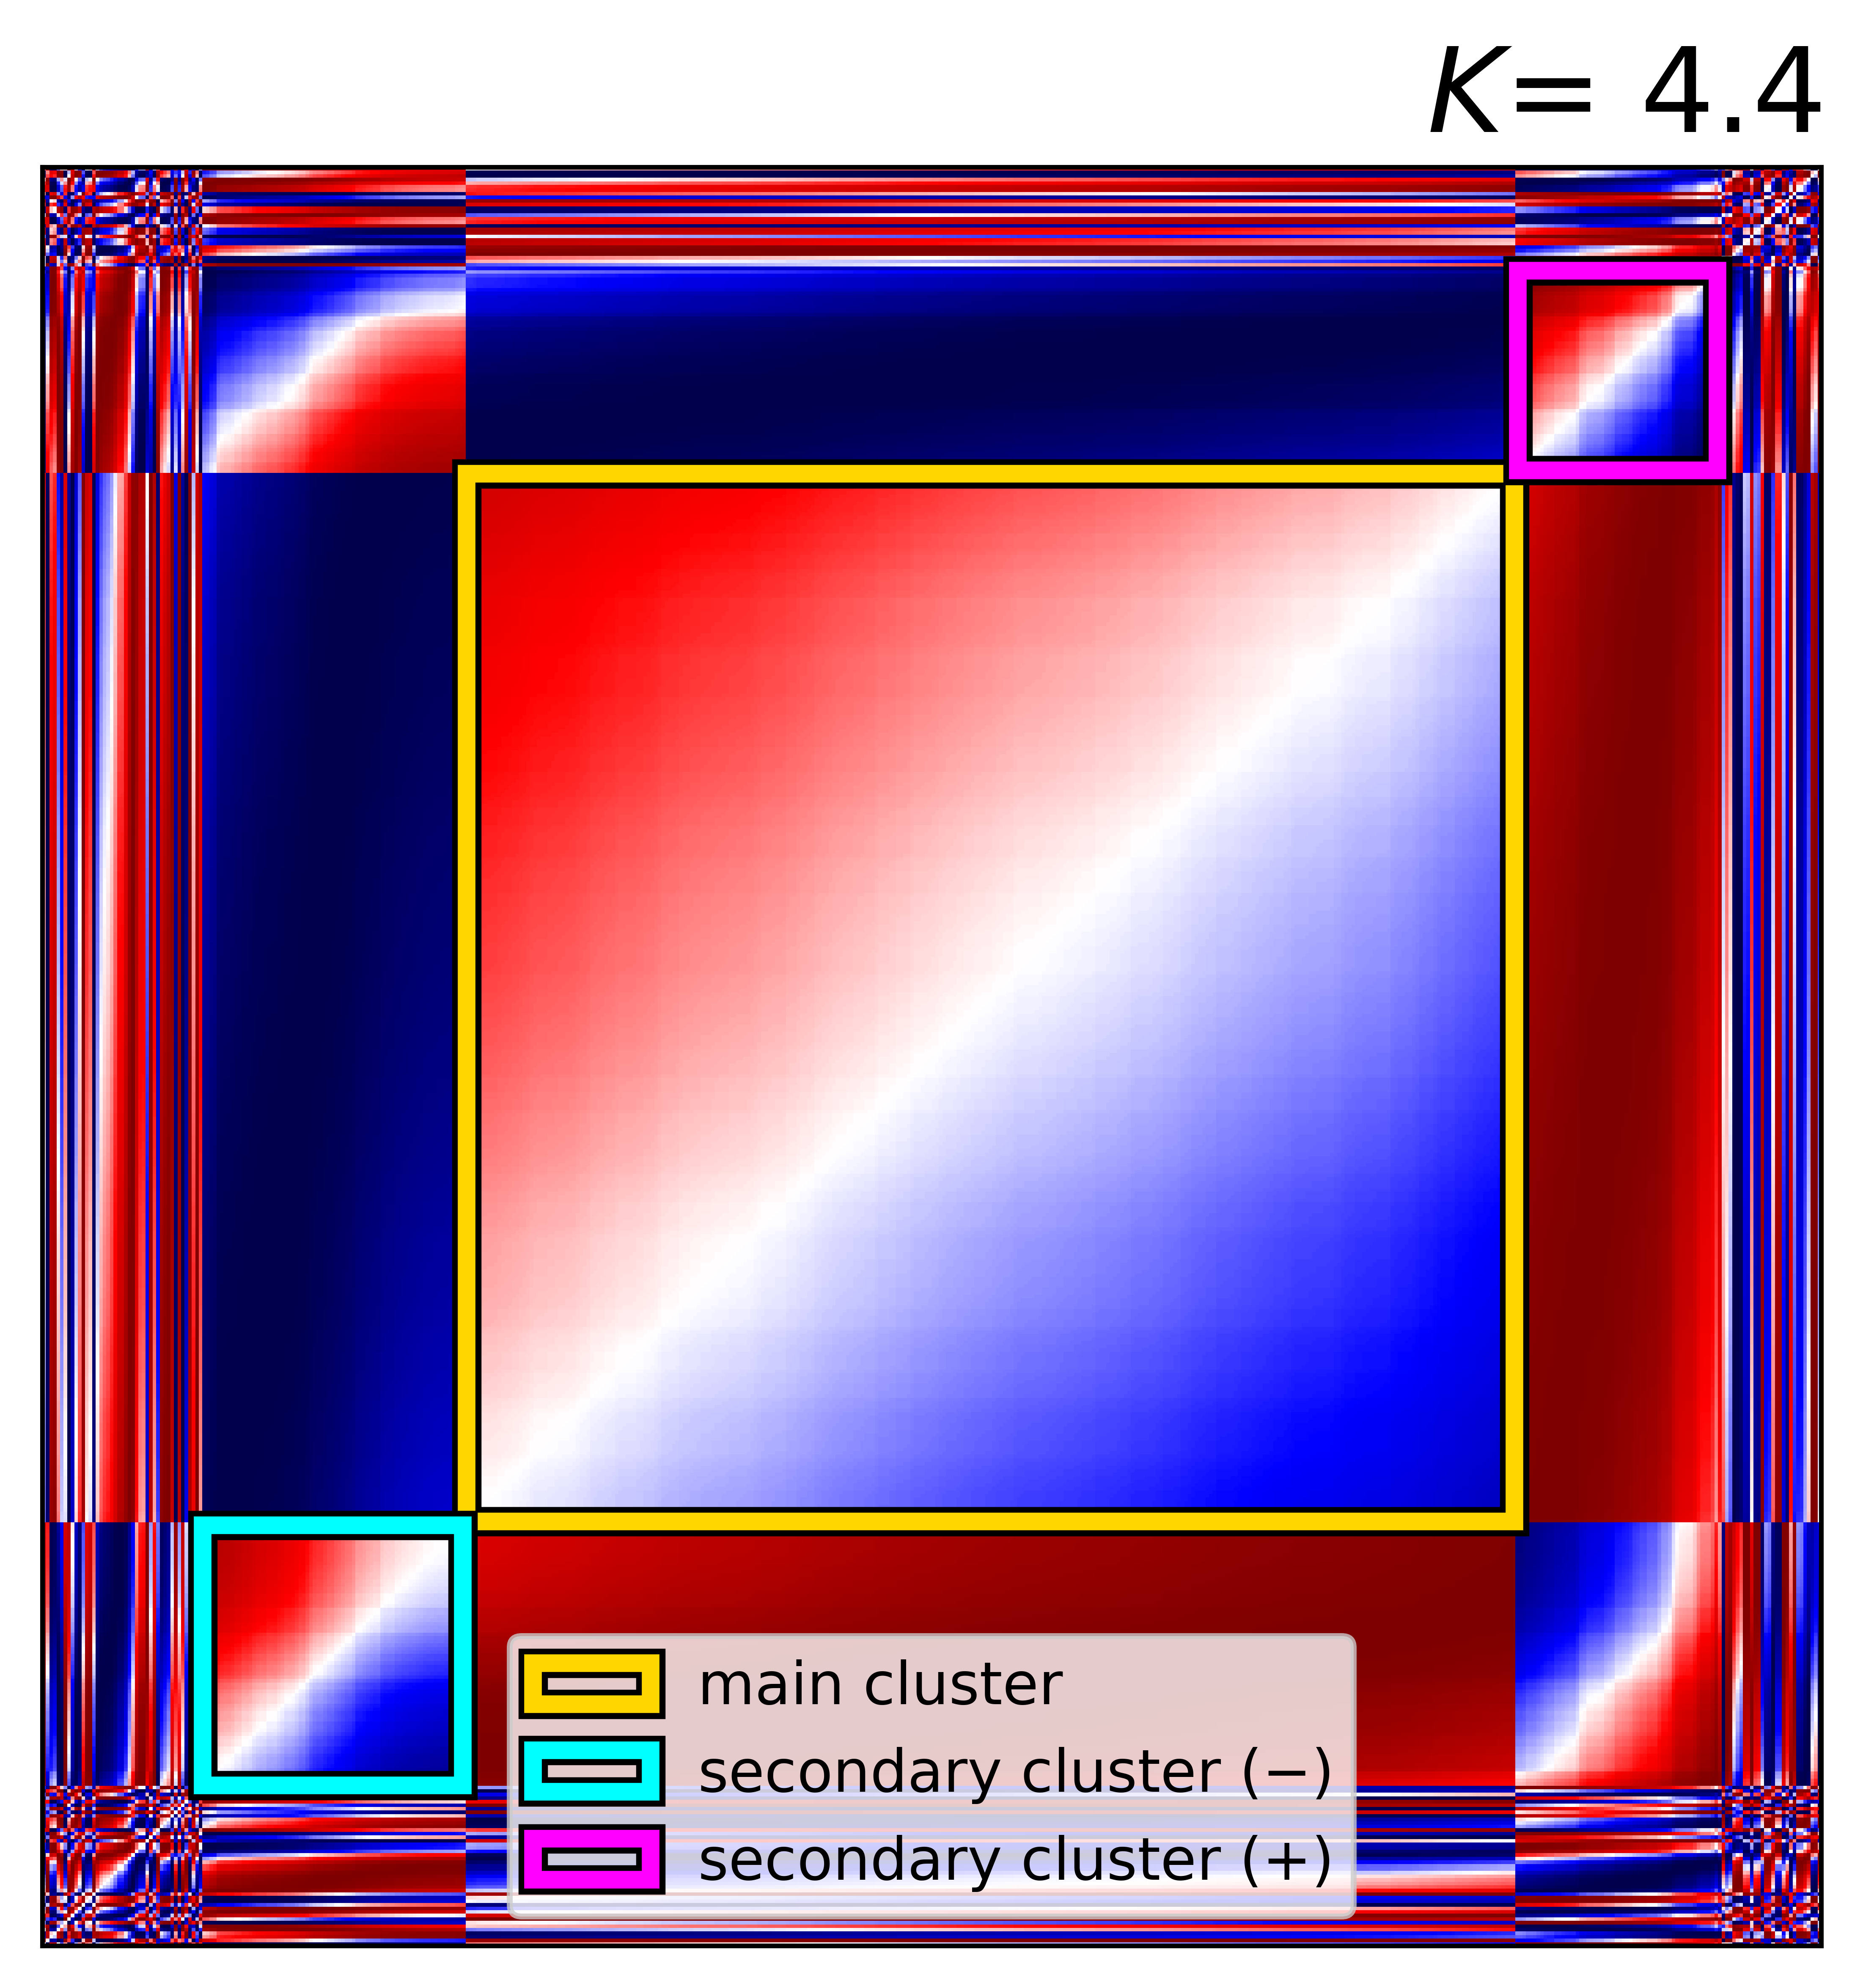

In [273]:
# plt.figure(figsize=(2.5,2.5),dpi=500)
plt.figure(dpi=500)
K_want = 4.4
theta = theta_dict[K_want]
rpsi = 1/N * np.sum(np.exp(1j*theta),axis=1)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
# fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 10),dpi=100,facecolor=(1,1,1,0))
ax = plt.gca()
seg_theta = theta[A[1]]
i,j = np.meshgrid(seg_theta,seg_theta)
im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,origin='lower',cmap = 'seismic',aspect=1,extent=[1,500,1,500])
RECs = []
for clu,color in zip([c0,c1,c2],colors):
    min_c,max_c = np.max(clu),np.min(clu)
    Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=5)
    Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=3)
    RECs.append((Rec_,Rec))
    plt.gca().add_patch(Rec_)
    plt.gca().add_patch(Rec)


    # ax.text(20,480,text_,horizontalalignment='left', verticalalignment='top',fontsize=25,bbox=mybox)
    plt.xticks([])
    plt.yticks([])
    ax = plt.gca()
ax.set_title(r'$K$= 4.4',fontsize=20,loc='right')
plt.legend(RECs,['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center')
# ax.set_title('(4c)',loc='left')
plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(2.5,2.5),dpi=500)
plt.figure()
K_want = 4.4
theta = theta_dict[K_want]
rpsi = 1/N * np.sum(np.exp(1j*theta),axis=1)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 10),dpi=100,facecolor=(1,1,1,0))
mybox={'facecolor':'white','edgecolor':'g','boxstyle':'round','alpha':0.9}
for ax,p_ in zip(axs,[+5,10]):
    plt.sca(ax)
    seg_theta = theta[A[1]+p_]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,origin='lower',cmap = 'seismic',aspect=1,extent=[1,500,1,500])
    RECs = []
    for clu,color in zip([c0,c1,c2],colors):
        min_c,max_c = np.max(clu),np.min(clu)
        Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=8)
        Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=6)
        RECs.append((Rec_,Rec))
        plt.gca().add_patch(Rec_)
        plt.gca().add_patch(Rec)
        # plt.plot([min_c,max_c],[min_c]*2,color=color,lw=2)
        # plt.plot([min_c,max_c],[max_c]*2,color=color,lw=2)
        # plt.plot([min_c]*2,[min_c,max_c],color=color,lw=2)
        # plt.plot([max_c]*2,[min_c,max_c],color=color,lw=2)
        # plt.fill_between([min_c,max_c],[min_c]*2,[max_c]*2,alpha=0.2,color=color)

    if p_<0:
        text_ = r'$t=t_i-$'+f'{abs(p_)}'
    else:
        text_ = r'$t=t_i+$'+f'{abs(p_)}'

    ax.text(20,480,text_,horizontalalignment='left', verticalalignment='top',fontsize=25,bbox=mybox)
    plt.xticks([])
    plt.yticks([])
    ax = plt.gca()
# ax.set_title(r'$K$= 4.4',fontsize=20,loc='right')
# plt.legend(RECs,['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center')
# ax.set_title('(4c)',loc='left')
plt.tight_layout()
plt.show()

In [ ]:
str(hex(10))

In [ ]:
alpha = 0.1
f'{round(alpha*255):02x}'

In [ ]:
(*mcl.to_rgb(color),alpha)

In [ ]:
R = [np.min(rs[:100]),np.mean(rs[:100]),np.max(rs[:100])]
R_to_idx = lambda x: np.searchsorted(rs[:100],x,'right')
tod = rs[:100]
A = np.array([np.argmin(tod),np.searchsorted(tod,np.mean(tod)),np.argmax(tod)])


In [ ]:
plt.plot(A,tod[A])

## Animation

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_2599/4136204767.py:83: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_2599/4136204767.py:84: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=color

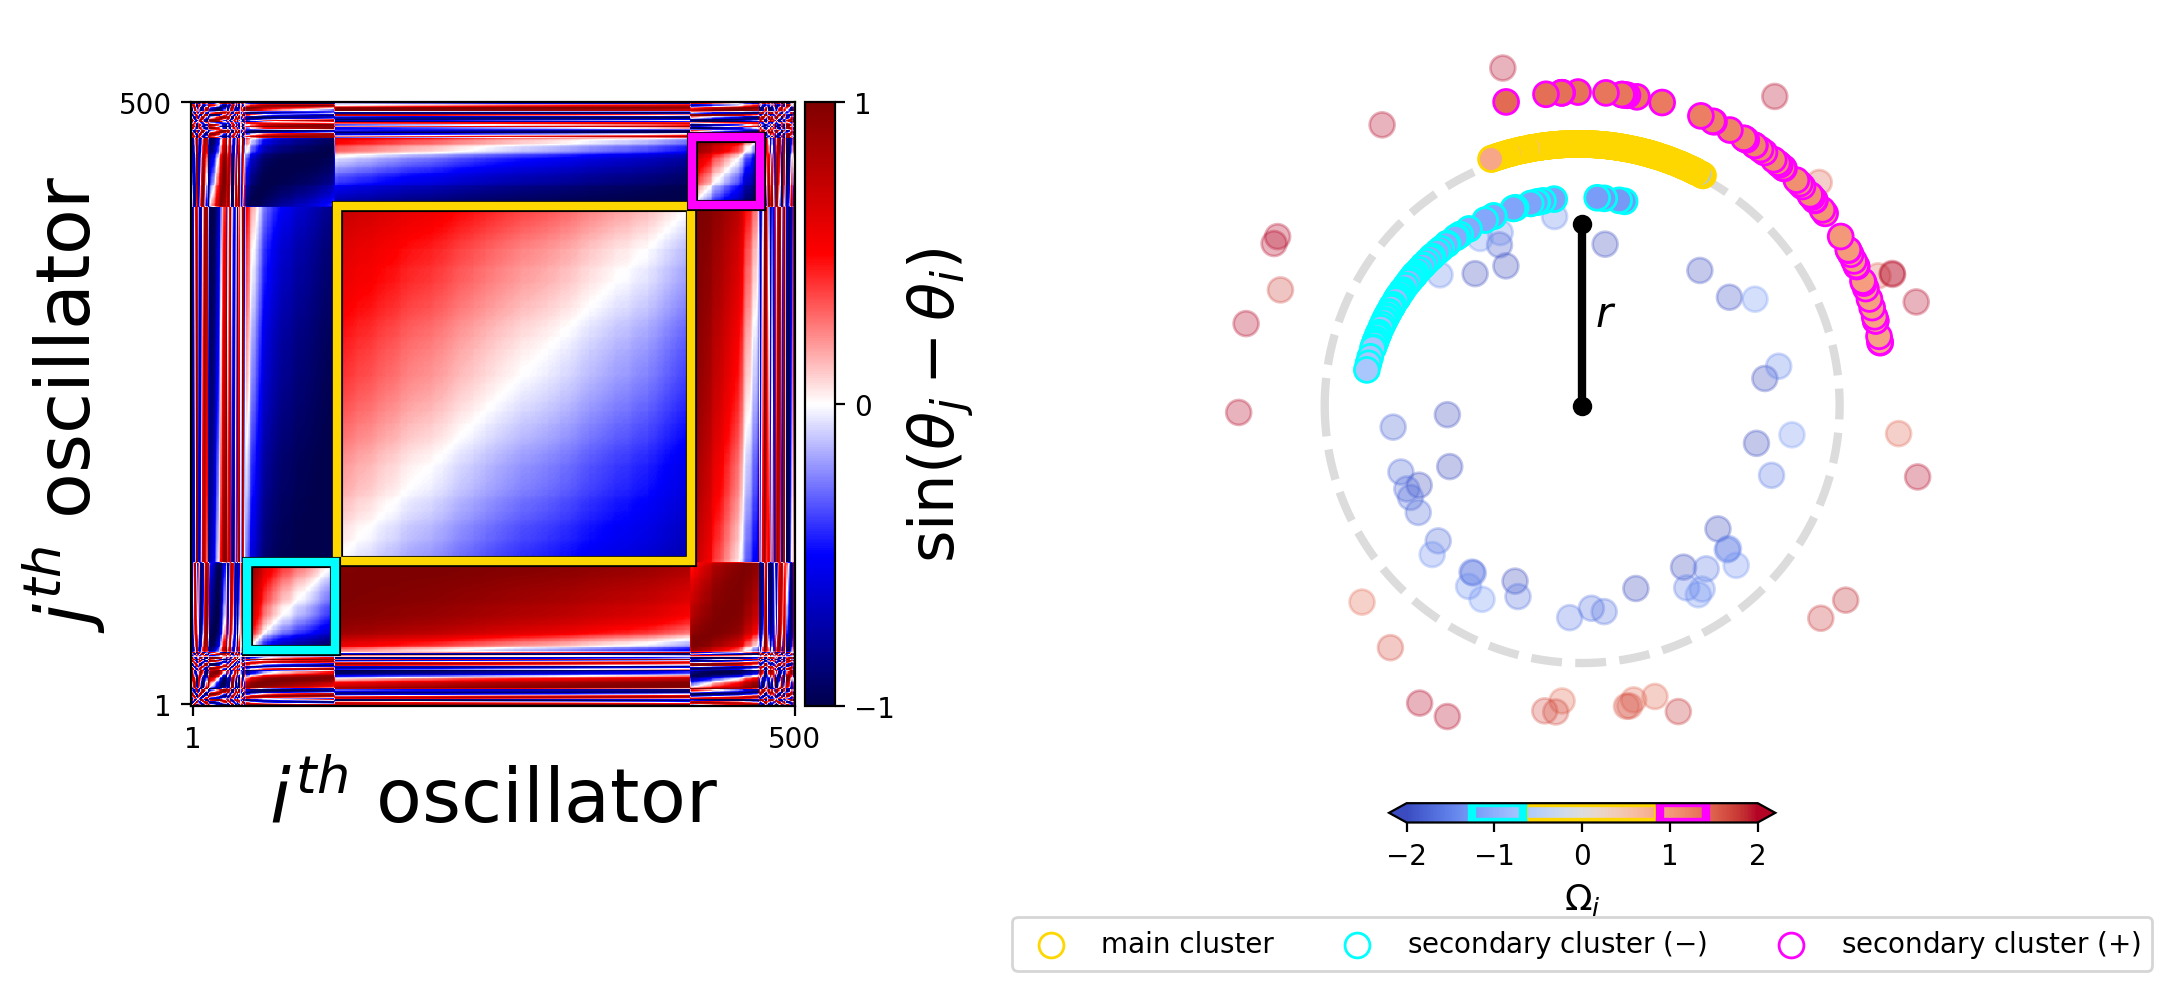

In [274]:
from itertools import combinations,permutations
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, (ax_sin, ax) = plt.subplots(ncols=2, nrows=1, figsize=(11, 6),dpi=100,facecolor=(1,1,1,0),width_ratios=[5,6])
multi_ = 1.5



i = 0
index = i
s = 800
cmap = 'bwr'
# colors = ['gold','darkslateblue','darkred']
colors = ['gold','aqua','fuchsia']

RECs = []
plt.sca(ax_sin)
I,J = np.meshgrid(theta[i],theta[i])
im = plt.imshow(np.sin(J-I),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
plt.xticks([1,500])
plt.yticks([1,500])
plt.xlabel(r'$i^{th}$ oscillator',fontsize=18*multi_)
plt.ylabel(r'$j^{th}$ oscillator',fontsize=18*multi_)

for clu,color in zip([c0,c1,c2],colors):
    min_c,max_c = np.max(clu),np.min(clu)
    Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=4)
    Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=3)
    RECs.append((Rec_,Rec))
    plt.gca().add_patch(Rec_)
    plt.gca().add_patch(Rec)
# plt.title(f'K = {Ks[K_idx]}',fontsize=18*multi_)
div = make_axes_locatable(ax_sin)
cax = div.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_ticks([-1,0,1])
cbar.set_label(r'$\sin(\theta_j-\theta_i)$',fontsize=15*multi_)
############################ rotator graph ####################

plt.sca(ax)
# colors = ['gold','darkslateblue','darkred']
X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
cmap = 'coolwarm'#'Spectral'#'viridis'#
s = 100
data = {
    'x': X[not_CLU],'y':Y[not_CLU],
    'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
    'cmap':cmap,
    # 'c': colors,#omega,'cmap':'YlOrRd',
}
cax_ = ax.scatter(**data,zorder=1)
alpha = 1
alpha_text = f'{round(alpha*255):02x}'
for clu,color in zip([c0,c1,c2],colors):
    data = {
        'x': X[clu],'y':Y[clu],
        'c': omega[clu],'cmap':cmap,
        'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
    cax = ax.scatter(**data,zorder=1)


ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
# ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
ax.set_aspect('equal')
cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
# cbar.ax.plot([0,1],[1]*2,'w')
for clu,color in zip([c0,c1,c2],colors):
    min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
    cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
    cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
    cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
    cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.25),ncols=3)
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')
ax.set_facecolor((1,1,1,0))
ax.set_aspect('equal')
for _ in range(100):fig.tight_layout()


# ax = plt.gca()

In [275]:
fig.set_facecolor('white')
def ANI2(A_idx):
    i = A_idx
    index = i
    s = 800
    cmap = 'bwr'
    # colors = ['gold','darkslateblue','darkred']

    RECs = []
    ax_sin.clear()
    # plt.sca(ax_sin)
    I,J = np.meshgrid(theta[i],theta[i])
    im = ax_sin.imshow(np.sin(J-I),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
    ax_sin.set_xticks([1,500])
    ax_sin.set_yticks([1,500])
    ax_sin.set_xlabel(r'$i^{th}$ oscillator',fontsize=18*multi_)
    ax_sin.set_ylabel(r'$j^{th}$ oscillator',fontsize=18*multi_)

    for clu,color in zip([c0,c1,c2],colors):
        min_c,max_c = np.max(clu),np.min(clu)
        Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=3)
        Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=2)
        RECs.append((Rec_,Rec))
        ax_sin.add_patch(Rec_)
        ax_sin.add_patch(Rec)
    ############################ rotator graph ####################
    ax.clear()

    # colors = ['gold','darkslateblue','darkred']
    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
    ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
    cmap = 'coolwarm'#'Spectral'#'viridis'#
    s = 100
    data = {
        'x': X[not_CLU],'y':Y[not_CLU],
        'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
        'cmap':cmap,
        # 'c': colors,#omega,'cmap':'YlOrRd',
    }
    cax_ = ax.scatter(**data,zorder=1)
    alpha = 1
    alpha_text = f'{round(alpha*255):02x}'
    for clu,color in zip([c0,c1,c2],colors):
        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)


    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    # ax.axis('off')

    ax.set_xticks([])
    ax.set_yticks([])
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)

    # ax = plt.gca()
    ax.set_aspect('equal')
    # cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
    # cbar.ax.plot([0,1],[1]*2,'w')
    for clu,color in zip([c0,c1,c2],colors):
        min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
        cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
    p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
    p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
    p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
    ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.25),ncols=3)
    # ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

    # cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.axis('off')
    ax.set_facecolor((1,1,1,0))
    ax.set_aspect('equal')
    fig.tight_layout()



In [276]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [277]:
idxs = range(400)
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,ANI2,frames=idxs,interval=50)
# ani.save('Groups oscillation2.mp4',dpi=400)
ani.save('230721 statphys poster/clusters oscillation m = 6, K = 4.4.mp4',dpi=400)
HTML(ani.to_html5_video())

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_2599/3601263421.py:71: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_2599/3601263421.py:72: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=color

In [ ]:
idxs = range(500)
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,ANI2,frames=idxs,interval=50)
# ani.save('Groups oscillation2.mp4',dpi=400)
ani.save('230721 statphys poster/cluster oscillation m = 6, K = 4.4.mp4',dpi=400)
# HTML(ani.to_html5_video())

In [ ]:
ls

## order parameter

In [215]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks

In [216]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
t = np.arange(0,1000,0.1)
K = 3.9
sum_time = 500
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)
multi = 1.5

NameError: name 'mean_r2' is not defined

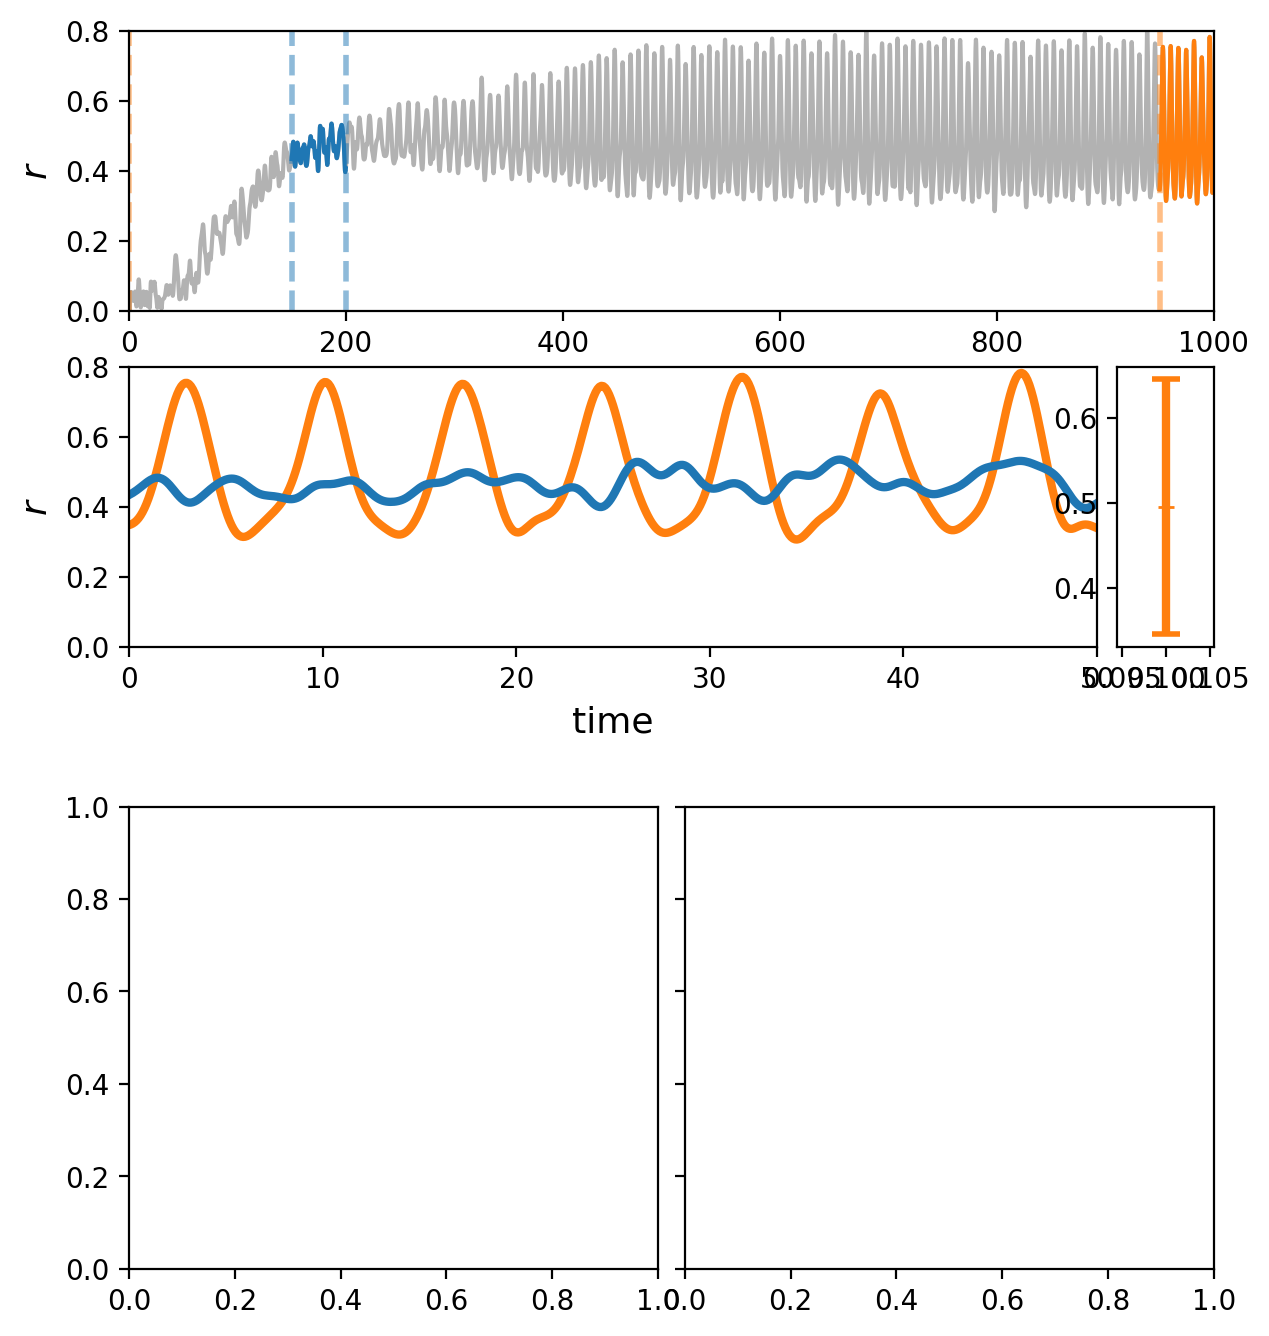

In [217]:
fig = plt.figure(figsize=(7,7))
subfigs = fig.subfigures(2,1,height_ratios=[2,1.5],hspace=15)
ax1,ax2 = subfigs[0].subplots(2,1)
ax31,ax32 = subfigs[1].subplots(1,2,sharey=True)
subfigs[1].subplots_adjust(wspace=0.05)
# fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(5,7),height_ratios=[1,1,2])
# fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(5,7),height_ratios=[1,1,1.5])

plt.sca(ax1)
plt.plot(t,rs,color ='k',alpha=0.3)
plt.plot(t[-500:],rs[-500:],color = 'tab:orange')
plt.plot(t[1500:2000],rs[1500:2000],color = 'tab:blue')
plt.axvline(t[1500],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')
plt.axvline(t[2000],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')

plt.axvline(t[-500],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.axvline(t[0],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.ylim(0,0.8)
plt.xlim(0,1000)

plt.ylabel(r'$r$',fontsize=13)
ax1.set_xlabel(r'time',fontsize=13)


plt.sca(ax2)
plt.ylabel(r'$r$',fontsize=13)
plt.xlabel(r'time',fontsize=13)

plt.xlim(0,50)
plt.plot(t[0:500],rs[-500:],color = 'tab:orange',lw=3)
plt.plot(t[0:500],rs[1500:2000],color = 'tab:blue',lw=3)

plt.ylim(0,0.8)


div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="10%", pad=0.1)
plt.sca(cax)
# plt.xticks([])
mean_r = np.mean(rs[-500:])
std_r = np.std(rs[-500:])
plt.setp(ax2.get_yticklabels(), visible=True)
plt.errorbar(0.1,mean_r,std_r,capsize=5,capthick=2,lw=3,fmt ='_',color='tab:orange')
plt.errorbar(-0.1,mean_r2,std_r2,capsize=5,capthick=2,lw=3,fmt ='_',color='tab:blue',zorder=3)
cax.set_ylim(0,0.8)
cax.set_xlim(-0.2,0.2)
cax.set_yticks([])
cax.set_xticks([])

mean_r2 = np.mean(rs[1500:2000])
std_r2 = np.std(rs[1500:2000])

# cax.set_title(r'$\bullet : r_{mean}$'+'\n'+'I$: r_{std.}$',fontsize=18)
# cax.set_title(r'$r$',fontsize=18)
plt.sca(ax1)
plt.title(r'$N= 500,m=6,K=3.9$',fontsize=15)


# cax.set_title(r'$\bar{r}$ $r(t)$ std.')

# plt.sca(ax3)

# ax31,ax32 = subfigs[2].subplots(1,2,sharex=True,sharey=True)
# subfigs[2].subplots_adjust(hspace=0.1)
avg1 = np.sort(avg_dtheta[-8000])
avg2 = np.sort(avg_dtheta[-1])
plt.sca(ax31)
plt.plot(avg1,lw = 3,color='tab:blue',label='time 1',zorder=10)
plt.ylabel('avg. angular vel.', fontsize=13)
plt.xlabel(r'$i^{th}$ oscillator',fontsize=15)
plt.sca(ax32)
plt.plot(avg2,lw = 3,color='tab:orange',label='time 2')
plt.xlabel(r'$i^{th}$ oscillator',fontsize=15)

# plt.legend(fontsize=10)


# fig.tight_layout()

In [ ]:
ax2.get_xlabel()

In [ ]:
arg = np.argsort(avg_dtheta[-1])
new_avg_dtheta = avg_dtheta[:,arg]
cluster_os_new2(avg_dtheta[0:1500])


[]

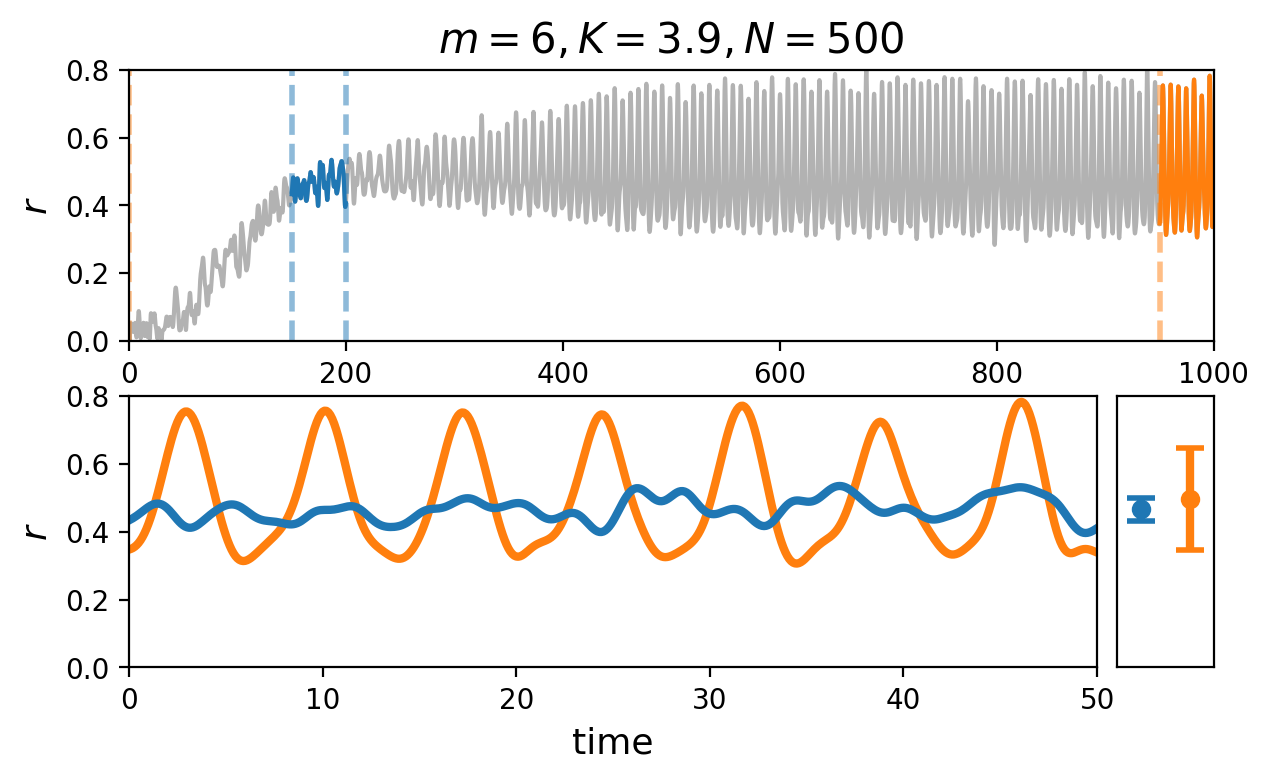

In [218]:
fig = plt.figure(figsize=(7,6))
# fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,5))
ax1 = fig.add_subplot(311)
plt.sca(ax1)
plt.plot(t,rs,color ='k',alpha=0.3)
plt.plot(t[-500:],rs[-500:],color = 'tab:orange')
plt.plot(t[1500:2000],rs[1500:2000],color = 'tab:blue')
plt.axvline(t[1500],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')
plt.axvline(t[2000],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')

plt.axvline(t[-500],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.axvline(t[0],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.ylim(0,0.8)
plt.xlim(0,1000)

plt.ylabel(r'$r$',fontsize=13)
ax1.set_xlabel(r'time',fontsize=13)
plt.title(r'$m=6,K=3.9,N=500$',fontsize=15)

ax2 = fig.add_subplot(312)
plt.sca(ax2)
plt.ylabel(r'$r$',fontsize=13)
plt.xlabel(r'time',fontsize=13)

plt.xlim(0,50)
plt.plot(t[0:500],rs[-500:],color = 'tab:orange',lw=3)
plt.plot(t[0:500],rs[1500:2000],color = 'tab:blue',lw=3)

plt.ylim(0,0.8)


div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="10%", pad=0.1)
plt.sca(cax)

mean_r = np.mean(rs[-500:])
std_r = np.std(rs[-500:])


mean_r2 = np.mean(rs[1500:2000])
std_r2 = np.std(rs[1500:2000])
plt.setp(ax2.get_yticklabels(), visible=True)
plt.errorbar(0.1,mean_r,std_r,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:orange')
plt.errorbar(-0.1,mean_r2,std_r2,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:blue',zorder=3)
cax.set_ylim(0,0.8)
cax.set_xlim(-0.2,0.2)
cax.set_yticks([])
cax.set_xticks([])
# cax.set_title(r'$\bar{r}$ & $r(t)$ std.')


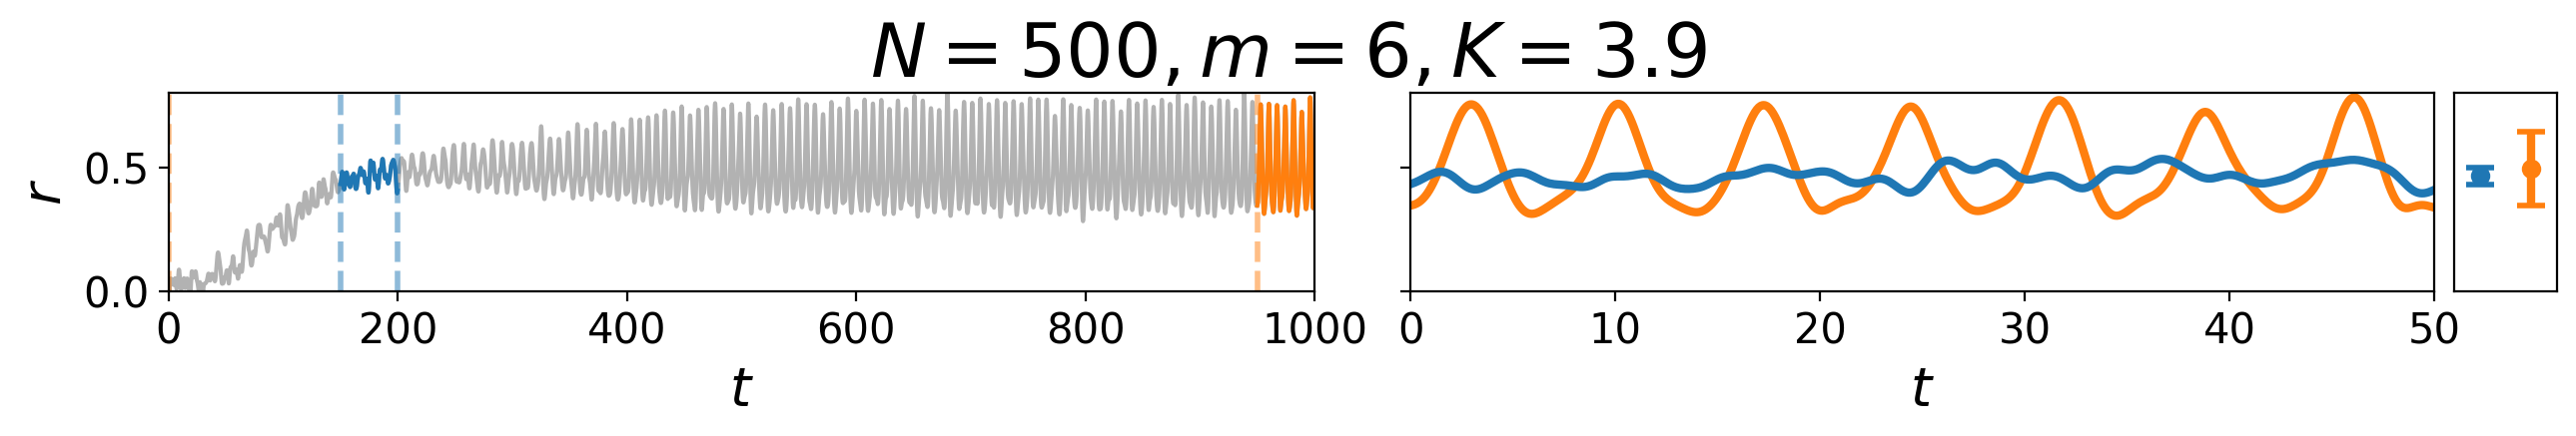

In [220]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,2.5))
plt.sca(ax1)
plt.plot(t,rs,color ='k',alpha=0.3)
plt.plot(t[-500:],rs[-500:],color = 'tab:orange')
plt.plot(t[1500:2000],rs[1500:2000],color = 'tab:blue')
plt.axvline(t[1500],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')
plt.axvline(t[2000],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')

plt.axvline(t[-500],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.axvline(t[0],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.ylim(0,0.8)
plt.xlim(0,1000)

plt.ylabel(r'$r$',fontsize=13*1.5)
ax1.set_xlabel(r'$t$',fontsize=13*1.5)


plt.sca(ax2)
plt.setp(ax2.get_yticklabels(), visible=False)

plt.xlabel(r'$t$',fontsize=13*1.5)

plt.xlim(0,50)
plt.plot(t[0:500],rs[-500:],color = 'tab:orange',lw=3)
plt.plot(t[0:500],rs[1500:2000],color = 'tab:blue',lw=3)

plt.ylim(0,0.8)


div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="10%", pad=0.1)
plt.sca(cax)
# plt.xticks([])
mean_r = np.mean(rs[-500:])
std_r = np.std(rs[-500:])
plt.setp(ax2.get_yticklabels(), visible=True)
plt.errorbar(0.1,mean_r,std_r,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:orange')
plt.errorbar(-0.1,mean_r2,std_r2,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:blue',zorder=3)
cax.set_ylim(0,0.8)
cax.set_xlim(-0.2,0.2)
cax.set_yticks([])
cax.set_xticks([])

mean_r2 = np.mean(rs[1500:2000])
std_r2 = np.std(rs[1500:2000])

# cax.set_title(r'$\bullet : r_{mean}$'+'\n'+'I$: r_{std.}$',fontsize=18)
# cax.set_title(r'$r$',fontsize=18)
# cax.set_title(r'$\bullet : r_{mean}$'+'\n'+'I$: r_{std.}$',fontsize=18)
# cax.set_title(r'$r$',fontsize=18*multi)
for ax in [ax1,ax2]:
    plt.sca(ax)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.suptitle(r'$N= 500,m=6,K=3.9$',fontsize=multi* 18,y=0.85)

plt.tight_layout()

In [ ]:
plt.plot(1,1,'o',color ='yellow',lw=5)

In [ ]:
plt.plot(new_avg_dtheta)

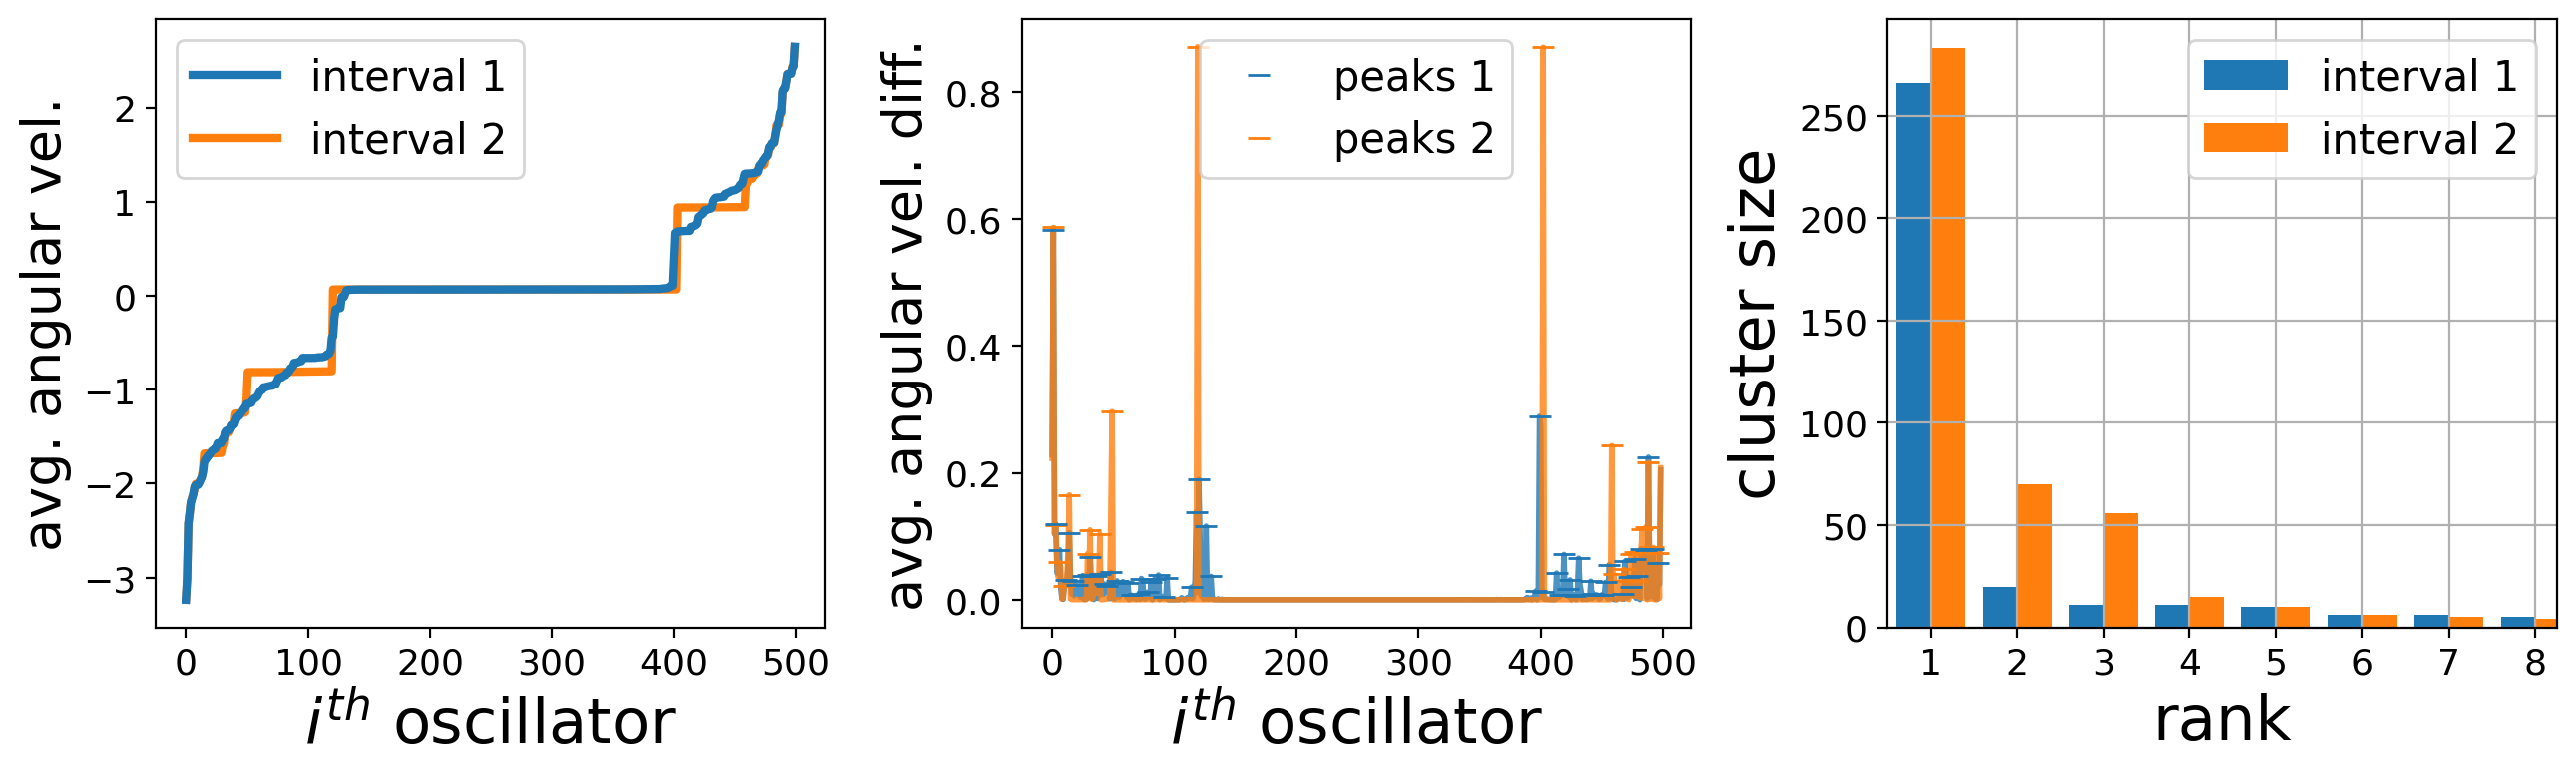

In [226]:
plt.figure(figsize=(13,4))
avg1 = np.sort(avg_dtheta[-8000])
avg2 = np.sort(avg_dtheta[-1])

diff1 = np.diff(avg1)
diff2 = np.diff(avg2)


ax1 = plt.subplot(131)
plt.plot(avg1,lw = 3,color='tab:blue',label='interval 1',zorder=10)
plt.plot(avg2,lw = 3,color='tab:orange',label='interval 2')
plt.xlabel(r'$i^{th}$ oscillator',fontsize=1.5*15)
plt.ylabel('avg. angular vel.', fontsize=1.5*13)
# plt.ylabel(r'$\langle$$\dot{\theta}_i$$\rangle$$_t$', fontsize=1.5*13)
plt.legend(fontsize=1.5*10)


ax2 = plt.subplot(132)

plt.plot(diff1,lw = 2,color='tab:blue',alpha=0.8)
peaks1, _ = find_peaks(diff1, height=0.005)
plt.plot(peaks1, diff1[peaks1], "_",label='peaks 1',markersize=8,color='tab:blue',zorder=5)


plt.plot(diff2,lw = 2,color='tab:orange',alpha=0.8)
peaks2, _ = find_peaks(diff2, height=0.005)
plt.plot(peaks2, diff2[peaks2], "_",label='peaks 2',markersize=8,color='tab:orange')


plt.legend(fontsize=1.5*10,loc='upper center')
plt.xlabel(r'$i^{th}$ oscillator',fontsize=1.5*15)
plt.ylabel('avg. angular vel. diff.', fontsize=1.5*13)
# plt.plot(np.zeros_like(diff1), "--", color="gray")

ax3 = plt.subplot(133)
diff_peaks1 = np.sort(np.diff(peaks1))[::-1]
diff_peaks2 = np.sort(np.diff(peaks2))[::-1]
plt.bar(np.arange(1,1+len(diff_peaks1))-0.2,np.sort(diff_peaks1)[::-1],width=0.4,label = 'interval 1')
plt.bar(np.arange(1,1+len(diff_peaks2))+0.2,np.sort(diff_peaks2)[::-1],width=0.4,label ='interval 2')

# plt.loglog()
plt.xticks([1,2,3,4,5,6,7,8]);
plt.xlim(0.5,8.25)
plt.grid()
plt.ylabel('cluster size',fontsize=1.5*15)
plt.xlabel('rank',fontsize=1.5*15)
plt.legend(fontsize=1.5*10)

for ax in [ax1,ax2,ax3]:
    plt.sca(ax)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

plt.tight_layout()

In [ ]:
df_2 =  pd.DataFrame(diff_peaks2)
df_1 =  pd.DataFrame(diff_peaks1,columns=[1])

In [ ]:
df = pd.concat([df_1,df_2],axis=1)

In [ ]:
import seaborn as sns

In [ ]:
plt.bar(np.arange(len(diff_peaks1)),np.sort(diff_peaks1)[::-1],width=0.5)
plt.bar(np.arange(len(diff_peaks2))-0.5,np.sort(diff_peaks2)[::-1],width=0.5)



In [ ]:
plt.bar(np.arange(1,1+len(diff_peaks1))-0.2,np.sort(diff_peaks1)[::-1],width=0.4,label = 'time 1')
plt.bar(np.arange(1,1+len(diff_peaks2))+0.2,np.sort(diff_peaks2)[::-1],width=0.4,label ='time 2')

# plt.loglog()
plt.xticks([1,2,3,4,5,6,7,8]);
plt.xlim(0.5,8.25)
plt.grid()
plt.ylabel('Cluster size')
plt.xlabel('Rank')
plt.legend()

# plt.yscale('log')

In [ ]:
df

In [ ]:
temp_0 = df[1].to_numpy()
temp_1 = df[0].to_numpy()

In [ ]:
np.where()